
# Inflación y Política Monetaria. Argentina, 1933-2024. Base de datos. 

### Autor
Lucas Tossolini

### Introducción
<div style="text-align: justify;">
Con la intensión de estudiar el desarrollo de la inflación en Argentina y los intentos de estabilización llevaros a cabo durante los diversos procesos inflacionarios, se construyó esta base de datos integrada tanto por series de tiempo como por datos no estructurados (particularmente textos). El objetivo específico de este conjunto de datos es el seguimiento del aumento de precios interno en relación a indicadores internacionales, junto con la descripción de la política monetaria empleada a lo largo del timpo. 
Los recursos disponibles son variados:
En primero lugar, contamos con un pequeño dataset, como introducción al problema, que describe distintas estapas de la política seguida para hacer frente a la inflación desde 1939 (ver línea de tiempo), incluyendo los siete planes de estabilización desarrollados en el país.
En segundo lugar, incluimos un dataset que recopila las Memorias del Banco Central entre 1935 y 1992, junto con los Informes del Banco Central al Congreso entre 1994 y 2022. Los textos, en formato legible, pueden emplearse para explorar diversos tópicos, su aparición a lo largo del tiempo y su tratamiento por parte de las autoridades monetarias (o el gobierno en general). Esto permite encontrar rápidamente referencias para, luego, realizar un análisis más exaustivo en el texto original.
Por último, encontramos diversas series de tiempo relacionadas con inflación de Argentina, inflación internacional y variables monetarias. Todas con periodicidad mensual, desde octurbe de 1933.
Cada dataset contiene la metadata necesaria para comprender su constucción y las fuentes empeladas. 
</div>

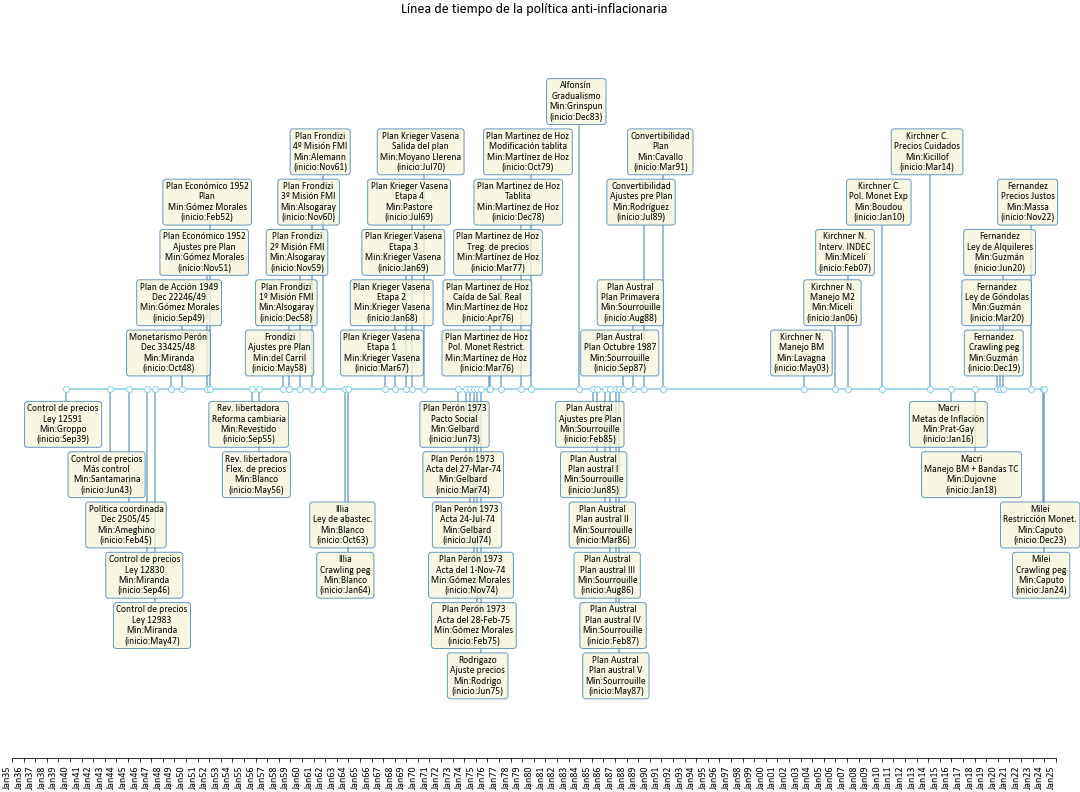

---
---

### Estructura de la Base de datos

La base de datos está estructurada como un diccionario, con los datos almacenados como pares de "clave": "valor". Esto implica la posibilidad de "anidar" los datos incluidos y poder acceder a ellos a través de las claves.  
Por ejemplo, utilizando la notación de Python, se puede acceder al conjunto de series sobre Índice de Precios al Consumidor de Argentina y a su metadata a través de las siguientes líneas de código:


`base_datos['series']['inflación']['IPC Argentina']['data']`

`base_datos['series']['inflación']['IPC Argentina']['metadata']`


En el caso de las series de tiempo, es recomendable trabajar convirtiendo los diccionarios en Dataframes de Pandas con la función *pd.DataFrame()*

In [163]:
import pandas as pd
import json
# Abrir el archivo JSON
with open('Inflación y Política Monetaria. Argentina, 1933-2024. Base de datos.json', 'r') as json_file:
    base_datos = json.load(json_file)

#### Contenido
La base de datos se creo conteniendo tres datasets principales, y dentro de cada uno, datasets más pequeños que pueden interelacionarse. 

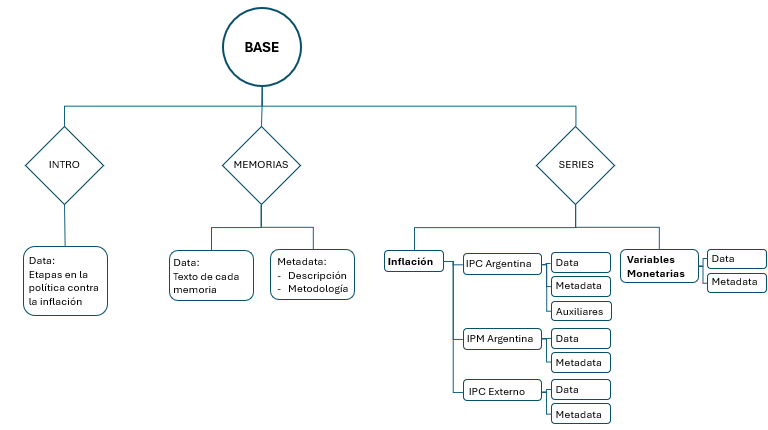

Esta estructura jerárquica nos permite contener, en un mismo archivo, elementos tan dispares como las Memorias del Banco Central, que están integrados por datos no estructurados (textos) y las series de tiempo, integradas por los tradicionales datos estructurados. 

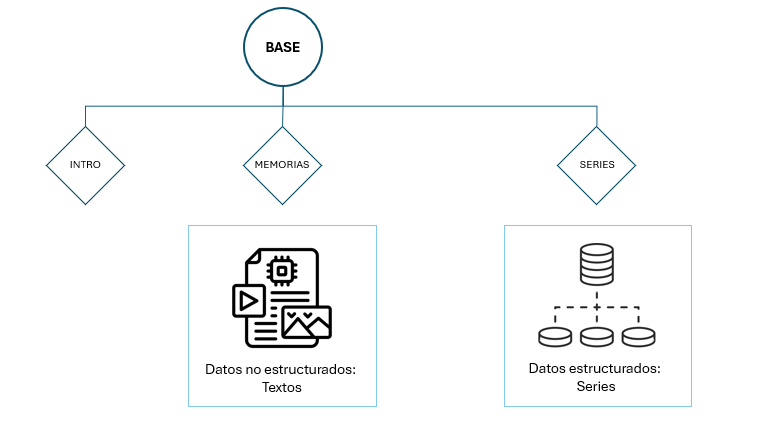

Esta base se presenta como un conjunto de dos archivos: uno JSON, que contiene a la base en sí, y puede emplearse con diversos programas y lenguajes; y este cuaderno de Jupyter (o notebook) programado en Python, con algunos análisis ya realizados. 

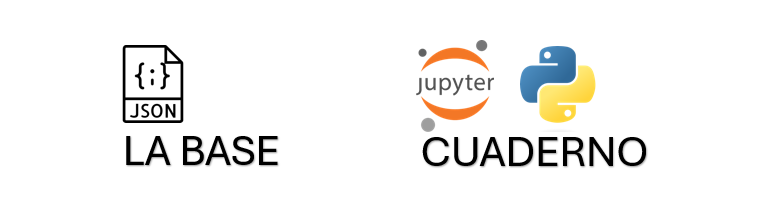

### Abriendo el dataset introductorio

Este es un ejemplo de cómo puede convertirse uno de los diccionarios integrantes de la base en un dataframe. Tomamos por caso el pequeño dataset introductorio. 

In [164]:
intro = pd.DataFrame(base_datos['intro'])

In [165]:
# Pasar la columna "Período" a fecha
intro['Período'] = pd.to_datetime(intro['Período'])

#### Creación de la línea de tiempo de política antiinflacionaria

In [166]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

#Definir una función para construir líneas de tiempo
def línea_de_tiempo (tiempo, hecho1, hecho2, hecho3, título, inicio, fin, salto_mes, mostrar_fecha):
    
    # Elegir niveles para las etiquetas
    levels = np.tile([-3, -15, -27, -39, -51, 
                      3, 15, 27, 39, 
                      -3, -15,  
                      3, 15, 27, 39, 51,
                      -27, -39, 
                      3, 15, 27, 39, 51,
                      -3, -15, -27, -39, -51, -63, 
                      3, 15, 27, 39, 51, 63,
                     -3, -15, -27, -39, -51, -63, 
                      3, 15, 
                      39, 51, 
                       3, 15, 27, 39, 51, 
                      -3, -15, 
                     3, 15, 27, 39, 
                      -27,-39],
                    int(np.ceil(len(tiempo) / 6)))[:len(tiempo)]

    # Crear la figura
    fig, ax = plt.subplots(figsize=(15, 12), layout="constrained") #definir tamaño de la línea de tiempo
    ax.set(title=título)
    ax.vlines(tiempo, 0, levels, color="steelblue", alpha=0.7)  # Líneas verticales.
    ax.plot(tiempo, np.zeros_like(tiempo), "-o",
            color="skyblue", markerfacecolor="w")  # Línea de base.

    if mostrar_fecha == 1:
        # Combinar período/plan y mes-año para etiquetas
        combined_text = [f"{p}\n{e}\nMin:{me}\n(inicio:{m})" for p,e,me,m in zip(hecho1, hecho2, hecho3, tiempo.dt.strftime('%b%y'))]  

        # Etiquetas
        for d, l, r in zip(tiempo, levels, combined_text):
            ax.annotate(r, xy=(d, l),
                        xytext=(-3, np.sign(l) * 3), textcoords="offset points",
                        horizontalalignment="center",
                        verticalalignment="bottom" if l > 0 else "top",
                        # Added line wrapping parameter
                        wrap=True,
                        fontsize=9.5,
                        rotation=0,
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor="steelblue", facecolor="beige", alpha=0.8))
    else:
        # Combinar período/plan y mes-año para etiquetas
        combined_text = [f"{p}\n{e}\n(Min:{me}" for p, e in zip(hecho1, hecho2, hecho3)]  

        # Etiquetas
        for d, l, r in zip(tiempo, levels, combined_text):
            ax.annotate(r, xy=(d, l),
                        xytext=(-3, np.sign(l) * 3), textcoords="offset points",
                        horizontalalignment="center",
                        verticalalignment="bottom" if l > 0 else "top",
                        # Added line wrapping parameter
                        wrap=True,
                        fontsize=9.5,
                        rotation=0,
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor="steelblue", facecolor="beige", alpha=0.8))
    
    
    # Límites para el eje de las X
    start_date = np.datetime64(inicio)
    end_date = np.datetime64(fin)
    ax.set_xlim(start_date, end_date)

    # Formato de Eje X
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=salto_mes))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b%y"))
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

    # Eliminar eje Y y spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.2)
    
    # Agregar la grilla vertical
    #ax.grid(visible=True, which='major', axis='both', color='gray', linestyle='--', linewidth=0.5)

    # Configuración de la tipografía
    plt.rcParams.update({
        'font.family': 'calibri',  # Fuente serif
        #'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 10,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
    })
    plt.savefig('Línea de tiempo.png', transparent=True)
    return plt.show()

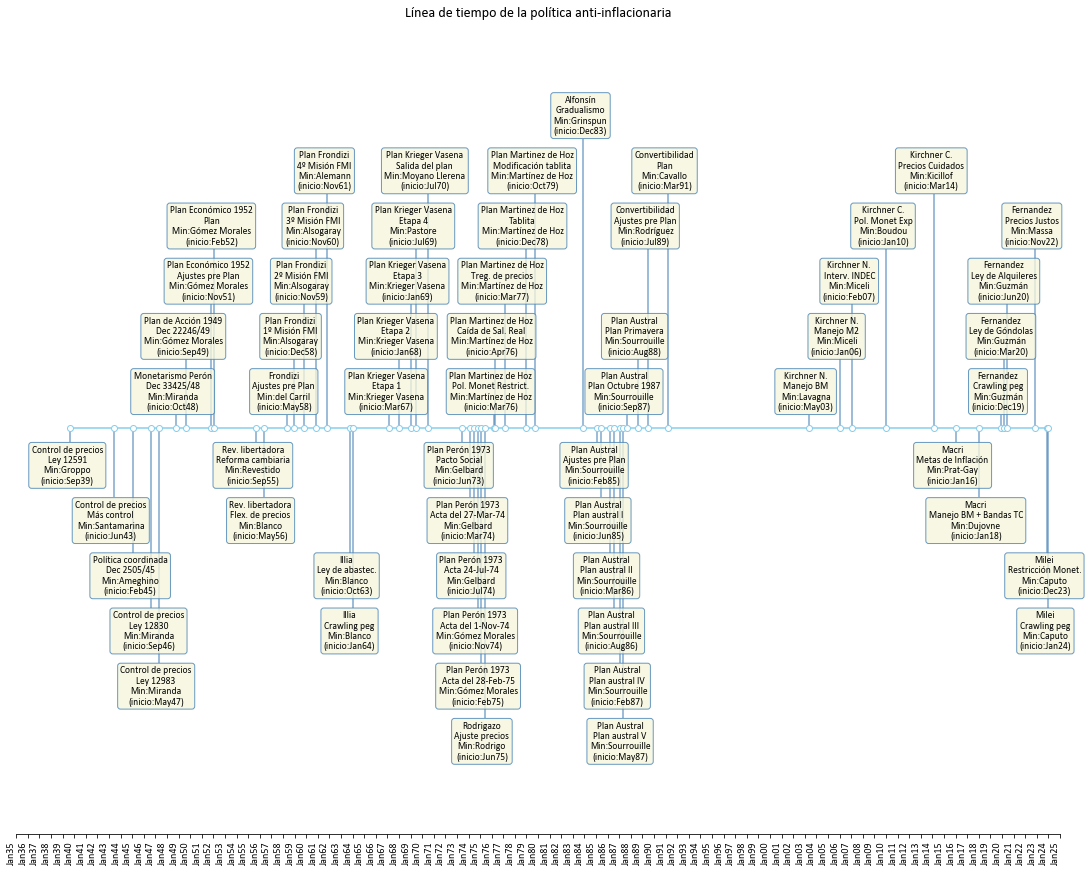

In [167]:
# Definir parámetros de las líneas de tiempo
inicio = '1935-01-01'
fin = '2025-01-01'
salto_mes =12
tiempo = intro['Período']
hecho1 = intro['Política']
hecho2 = intro['Etapa']
hecho3 = intro['Ministro de economía']
titulo = "Línea de tiempo de la política anti-inflacionaria"
línea_de_tiempo (tiempo, hecho1, hecho2, hecho3, titulo, inicio, fin, salto_mes, 1) #muestra con fecha

---
---

### Abriendo dataset de Memorias e Informes del Banco Central

In [168]:
memorias_data = base_datos['memorias']['data'] #Se trabaja como diccionario, no como dataframe

<a id="funcionesdiccmem"></a>
#### Se crean funciones para procesar el diccionario de memorias

In [169]:
#Función que busca palabras en el diccionario que contiene el texto de todas las memorias, 
#y crea un dataframe con los resultados
from unidecode import unidecode
import unidecode
import re
import pandas as pd

def buscar_tema(lista_tema, memorias):
    mems = []
    años = []
    palabras = []
    apariciones = []
    nros_paginas = []
    parrafos_lista = []

    for mem, memoria in memorias.items():
        for tema in lista_tema:
            cantidad_palabras = 0
            paginas = []
            parrafos = []
            # Convertir la palabra buscada en su equivalente sin tilde
            tema_sin_tilde = unidecode.unidecode(tema)
            for i, pagina in enumerate(memoria):
                # Expresión regular \b{}\w*\b para buscar palabras que contengan la palabra 
                # buscada como parte de una palabra más grande
                # ignore mayúsculas y minúsculas y acepte tanto palabras con como sin tilde
                matches = re.findall(r'\b{}\b|\b{}\w*\b'.format(tema, tema_sin_tilde), pagina, re.IGNORECASE)
                if len(matches) > 0:
                    # Dividir el texto de la página en párrafos
                    paragraphs = pagina.split('\n\n')
                    # Encontrar los párrafos que contienen la palabra buscada y mostrar el texto cercano
                    for j, paragraph in enumerate(paragraphs):
                        if any(match in paragraph for match in matches):
                            paginas.append(i + 1)
                            parrafos.append(paragraph)
                    cantidad_palabras = cantidad_palabras + len(matches)

            # Almacena en listas toda la información
            mems.append(mem)
            años.append(int(mem[3:]))
            palabras.append(tema)
            apariciones.append(cantidad_palabras)
            nros_paginas.append(paginas)
            parrafos_lista.append(parrafos)
        
    #crear el Dataframe
    datos = {'mem': mems, 'años': años, 'palabras': palabras, 'apariciones': apariciones, 
             'paginas del pdf': nros_paginas, 'parrafos': parrafos_lista}
    df_apariciones = pd.DataFrame(datos)
    return df_apariciones

In [170]:
#Función que corrige los párrafos
#Usa la librería Spell Checker
from spellchecker import SpellChecker
# Crear un objeto SpellChecker para español
corrector = SpellChecker(language='es')

def corregir_parrafo(parrafo):
    #reemplazar espacios+puntos
    parrafo = parrafo.replace(' .', '')
    parrafo = parrafo.replace(' ,', '')
    # Reemplazar los guiones y saltos de línea por un espacio vacío
    parrafo = parrafo.replace('-\n', '')
    parrafo = parrafo.replace('\n', ' ')
    oraciones_corregidas = []
      
    # Separa el párrafo en oraciones
    oraciones = parrafo.split('.')
    for oracion in oraciones:
        sub_oraciones_corregidas = []
        sub_oraciones = oracion.split(',')
        #realiza la corrección para cada oración
        for sub_oracion in sub_oraciones:
            palabras = sub_oracion.split()
            # Corrige cada palabra
            corregidas = [corrector.correction(palabra) if corrector.correction(palabra) is not None else palabra for palabra in palabras]
            sub_oraciones_corregidas.append(' '.join(palabra for palabra in corregidas if palabra is not None))
        oraciones_corregidas.append(', '.join(sub_oracion for sub_oracion in sub_oraciones_corregidas if sub_oracion is not None))
        

    # Une las oreaciones corregidas con comas 
    return '. '.join(oracion for oracion in oraciones_corregidas)

<a id="buscartema"></a>
#### Buscar un tema en las memorias
Este segmento incluye la posibilidad de una "traducción" de datos no estructurados en estructurados, a través de la búsqueda de un concepto o palabra. Se recopilan las apariciones de las palabras en las memorias y se crea un dataframe de apariciones, incluyendo el texto a su alrededor.

In [171]:
lista_tema = ['inflación']

La palabra "inflación" apareció en 80 años
Apereció un máximo de 92 veces
en el año 1955
--------------------
Apariciones de "inflación" por año


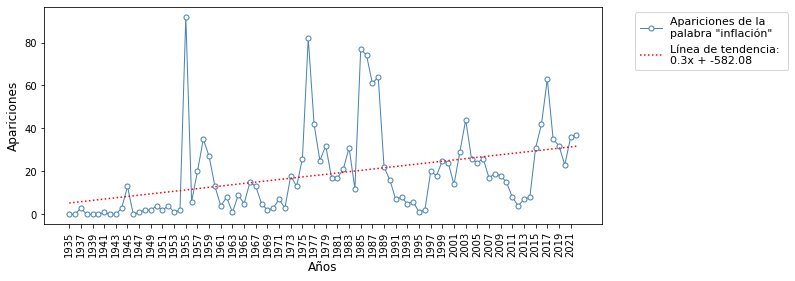

In [172]:
#Aplica la función buscar
df_apariciones = buscar_tema(lista_tema, memorias_data)

#Grafica resultados
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la tipografía
plt.rcParams.update({
    'font.family': 'sans-serif',  # Fuente serif
    'font.serif': 'calibri',  # Tipo de fuente serif
    'font.size': 11,  # Tamaño de la fuente
    'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
    'axes.titlesize': 14,  # Tamaño del título del gráfico
    'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
    'legend.fontsize': 11,  # Tamaño de la leyenda
})

for tema in lista_tema:
    df_apariciones_1 = df_apariciones[df_apariciones['palabras'] == tema]
    aparece = df_apariciones_1["apariciones"] != 0
    max_apariciones = df_apariciones_1['apariciones'].max()
    fila_max_apariciones = df_apariciones_1[df_apariciones_1['apariciones'] == max_apariciones]
    años_max_apariciones = fila_max_apariciones['años'].values[0]
    if aparece.sum() == 0:
        print(f'La palabra "{tema}" no apareció en la búsqueda')
    else:
        print(f'\033[1mLa palabra "{tema}" apareció en {aparece.sum()} años\033[0m')
        print(f'Apereció un máximo de {max_apariciones} veces\nen el año {años_max_apariciones}')
        print('-'*20)

        # Extraer las columnas de interés
        años = df_apariciones_1['años']
        apariciones = df_apariciones_1['apariciones']
        
        # Calcular la línea de tendencia (usando ajuste lineal)
        pendiente, interseccion = np.polyfit(años, apariciones, 1)

        # Modificar el tamaño del gráfico
        plt.figure(figsize=(10, 4))

        # Crear el gráfico de línea con marcadores de relleno blanco
        plt.plot(años, apariciones, marker='o', 
         color='steelblue', 
         markerfacecolor='white', 
         markersize=5, 
         linewidth=1,
         label=f'Apariciones de la\npalabra "{tema}"')
        
        # Agregar la línea de tendencia
        plt.plot(años, pendiente * años + interseccion, 
                 color='red', 
                 linestyle=':', 
                 label=f'Línea de tendencia: \n{round(pendiente, 2)}x + {round(interseccion, 2)}')

        # Etiquetas de los ejes y título del gráfico
        plt.xlabel('Años')
        plt.ylabel('Apariciones')
        #plt.title(f'Apariciones de "{tema}" por año')

        # Rotar las etiquetas del eje X y ajustar el espaciado entre ellas
        plt.xticks(rotation=90)
        plt.xticks(años[::2])

        # Eliminar las líneas de cuadrícula
        plt.grid(False)
        
        # Mostrar la leyenda
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        print(f'Apariciones de "{tema}" por año')
        # Mostrar el gráfico
        plt.show()

<a id="añoparticular"></a>
#### Trabajar con años particulares
Es recomendable, para que el procesamiento de párrafos no sea demasiado lento, realizar búsquedas con una cantidad limitada de años

In [173]:
año0 = 1946
añoX = 1949
años_trabajar = [x for x in range(año0, añoX+1)]

In [174]:
años_trabajar

[1946, 1947, 1948, 1949]

In [175]:
print(f'Dataframe de apariciones de los años {años_trabajar}')
df_apariciones[df_apariciones['años'].isin(años_trabajar)]

Dataframe de apariciones de los años [1946, 1947, 1948, 1949]


mem  años   palabras  apariciones paginas del pdf  \
11  mem1946  1946  inflación            0              []   
12  mem1947  1947  inflación            1            [75]   
13  mem1948  1948  inflación            2        [23, 59]   
14  mem1949  1949  inflación            2        [24, 58]   

                                             parrafos  
11                                                 []  
12  [“, ..a un gran esfuerzo de dinámica como el q...  
13  [En las postrimerías del año 1948, el Gobierno...  
14  [En esta forma, las medidas implantadas en año...

Enumerar los párrafos que contienen los temas de interés en los años especificados 

In [176]:
#Busca, procesa e imprime los párrafos que contienen el tema en los años definidos
dicc_de_lista_párrafos_de_interés_corregidos = {}

for año_trabajar in años_trabajar:
    df_apariciones_individual = df_apariciones[df_apariciones['años'] == año_trabajar]
    df_apariciones_individual = df_apariciones_individual.reset_index()
    df_apariciones_individual = df_apariciones_individual.drop('index', axis=1)

    lista_párrafos_de_interés_corregidos = []

    for tema in lista_tema:
        dicc_de_lista_párrafos_de_interés_corregidos_por_año = {}
        df_apariciones_individual_2 = df_apariciones_individual.copy()
        corte_palabra = df_apariciones_individual_2[df_apariciones_individual_2['palabras'] == tema]
        si_aparece = corte_palabra['apariciones'].values[0]
        if si_aparece== 0:
            print(f'\033[1mLa palabra "{tema}" no apareció en el año {año_trabajar}\033[0m')
            print('-'*30)
        else:
            lista_páginas_pdf = df_apariciones_individual_2[df_apariciones_individual_2['palabras'] == tema]\
            ['paginas del pdf'].tolist()[0]      
            lista_párrafos_de_interés = \
            df_apariciones_individual_2[df_apariciones_individual_2['palabras'] == tema]\
            ['parrafos'].tolist()[0]

            print(f'\033[1mHay {len(lista_párrafos_de_interés)} párrafos con la palabra "{tema}" en el año {año_trabajar}\033[0m')
            print('-'*30)
            for i in range(len(lista_párrafos_de_interés)):
                print(f'Párrafo nro {i+1}')
                print(f'Página del PDF nro: {lista_páginas_pdf[i]}')
                lista_párrafos_de_interés_corregidos.append(corregir_parrafo(lista_párrafos_de_interés[i]))
                print(lista_párrafos_de_interés_corregidos[i].replace(tema, f"\033[1m{tema}\033[0m")) #aplica la función para corregir párrafos
                print('.'*10)
    
        dicc_de_lista_párrafos_de_interés_corregidos_por_año[tema] = lista_párrafos_de_interés_corregidos
    dicc_de_lista_párrafos_de_interés_corregidos[año_trabajar] = dicc_de_lista_párrafos_de_interés_corregidos_por_año

La palabra "inflación" no apareció en el año 1946
------------------------------
Hay 1 párrafos con la palabra "inflación" en el año 1947
------------------------------
Párrafo nro 1
Página del PDF nro: 75
a, . a un gran esfuerzo de dinámica como el que estamos realizando y nos proponemos intensificar, debe acompañar necesariamente una mayor circulación fiduciaria. En un país de economía agropecuaria pura, la circulación es normalmente reducida y tiene tan sólo variaciones estacionales que dependen principalmente de la recolección y comercialización de las cosechas. La actividad industrial cambia esa figura. La constante adquisición de materias primas, el pago quincenal de los salarios y sus consiguientes compras, la renovación de los stocks, son otros tantos hechos que aumentan el volumen de medios de pago necesarios y que influyen. en la velocidad de la circulación monetaria. Se trata, pues, de hechos normales que no pueden ser confundidos con inflación, aunque esos hechos están ocur

#### Procesamiento de lenguaje natural

Con los párrafos enumerados pueden realizarse diversos análisis de lenguaje. Uno de los más simples, es la búsqueda de palabras con más presencia. Por ejemplo, aquí se buscan las palabras que acompañan a cada tema buscado, tratando de definir ls más frecuentes visualmente por medio de nubes de palabras. 

#### Tokens 
La "tokenización" permite separar los párrafos en "tokens", o sea, en las palabras individuales. Esto se hace para cada año y tema por separado. 





In [177]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#tokenizar las listas de párrafos corregidos de cada año y cada tema
dicc_de_lista_párrafos_de_interés_tokens = {}
for año_trabajar in años_trabajar:
    dicc_de_lista_párrafos_de_interés_tokens_por_año = {}
    for tema in lista_tema:
        lista_párrafos_de_interés_corregidos_tokens = [word_tokenize(cadena) for cadena in dicc_de_lista_párrafos_de_interés_corregidos[año_trabajar][tema]]
        dicc_de_lista_párrafos_de_interés_tokens_por_año[tema] = lista_párrafos_de_interés_corregidos_tokens
    
    dicc_de_lista_párrafos_de_interés_tokens[año_trabajar] = dicc_de_lista_párrafos_de_interés_tokens_por_año

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


A continuación, se realiza una limpieza sobre las palabras y se crean las nubes por años y temas.



Palabras que acompañan a "inflación" en el año 1947


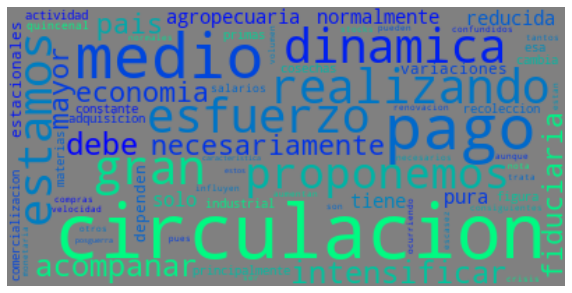

Palabras que acompañan a "inflación" en el año 1948


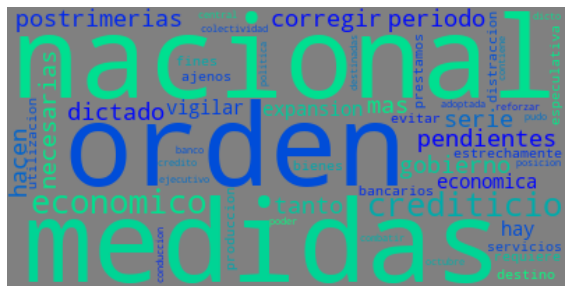

Palabras que acompañan a "inflación" en el año 1949


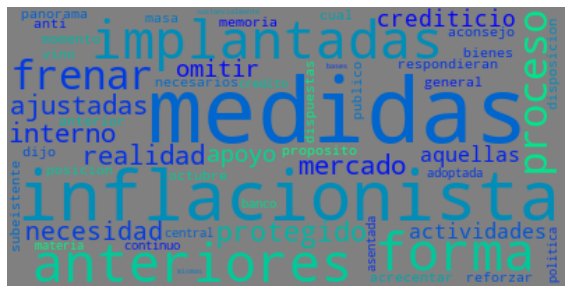

In [178]:
import re
import string
from unidecode import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lista de palabras comunes a eliminar, incluyendo las palabras de los temas buscados
palabras_a_eliminar = ['ministerio', 'agricultura', 'industria', 'comercio', 'secretaria', 
                       'o', 'ley', 'decreto', 'resolución' ,'se', 'no', 'n°' ,'que', 'en', 'y', 'el', 'la', 
                       "'la", 'los', 'las', 'un', 'una', 'unos', 'unas', 'de',"'de", 'del', 'al', 'con', 'para', 
                       'por', 'entre', 'sobre', 'tras', 'sin', 'a', 'ante', 'bajo', 'hacia', 'su', 'como',
                       'sus', 'esta', 'este', 'dio', 'durante', 'sin', 'embargo', 'es', 'ha', 'han', 'habria', 'hecho',
                       'hechos', 'año','ano', 'años', 'anos', 'nos', 'tan', 'ese', 'esos']
    
tema_sin_tilde = [unidecode(tema) for tema in lista_tema]
palabras_a_eliminar.extend(tema_sin_tilde)

signos_puntuacion = set(string.punctuation)
espacios = {' '}

for año_trabajar in años_trabajar:
    if dicc_de_lista_párrafos_de_interés_tokens.get(año_trabajar): #chequea que el año tenga datos
        for tema in lista_tema:
            if dicc_de_lista_párrafos_de_interés_tokens[año_trabajar].get(tema): #chequea que el tema tenga datos
                #unifica todos los tokens en una única lista
                all_tokens = []
                for sublist in dicc_de_lista_párrafos_de_interés_tokens[año_trabajar][tema]:
                    all_tokens.extend(sublist) 
                #pasa todo a minúsculas
                lista_palabras = [token.lower() for token in all_tokens] 
                # eliminar números
                lista_palabras_limpio = [unidecode(token) for token in lista_palabras if not token.isdigit()]
                #Eliminar palabras definidas previamente
                lista_palabras_limpio = [token for token in lista_palabras_limpio if token not in palabras_a_eliminar]
                # elimina signos de puntuación y espacios
                lista_palabras_limpio = [token for token in lista_palabras_limpio if token not in signos_puntuacion]
                lista_palabras_limpio = [token for token in lista_palabras_limpio if token not in espacios]

                # Crea la nube de palabras
                texto = ' '.join(lista_palabras_limpio)
                wordcloud = WordCloud(background_color="grey", colormap = 'winter_r').generate(texto)
                # Muestra la nube de palabras
                print (f'Palabras que acompañan a "{tema}" en el año {año_trabajar}')
                plt.figure(figsize=(10, 10))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.show()

#### Metadata del dataset de memorias e informes

In [179]:
memorias_metadata = base_datos['memorias']['metadata']
print('_'*20)

print(f'\033[1mAlmacenamiento del texto de las Memorias:\033[0m')
print('.'*20)
for j, val in memorias_metadata['metodología'].items():
    print (val)
print('_'*20)
print('\033[1mUso:\033[0m')
print('.'*20)
print(memorias_metadata['usabilidad'])
print('_'*20)
print('\033[1mFuente:\033[0m')
print('.'*20)
for j, val in memorias_metadata['fuente'].items():
    for j, val in memorias_metadata['fuente'][j].items():
        print (val)

____________________
Almacenamiento del texto de las Memorias:
....................
Se emplearon varias librerías de Python (PyPDF2, pytesseract, PIL, pdf2image) 
para aplicar un Reconocimiento Óptico de Caracteres y transformar los PDFs no legibles 
disponibles en la página web del Banco Central en texto con capacidad de búsqueda
A partir de los textos legibles se construyó un diccionario de Python con 
clave = memXXXX y valor = texto de la memoria
Se almacenó el resultado como un archivo JSON
____________________
Uso:
....................
al abrir el archivo JSON se pueden ejecutar búsquedas en cada memoria o informe, o iterarlas 
para realizar una búsqueda global. La información obtenida con este trabajo exploratiorio permite
volver al texto original para profundizar el análisis, pero con una orientación mayor. 
Además, puede obtenerse el texto cercano a ciertos temas en cada memoria, extraerlo, corregirlo y 
dejarlo disponible para ser citado
____________________
Fuente:
..........

---
---

### Abriendo el dataset de series y viendo su contenido

In [180]:
import pandas as pd
import json
with open('Inflación y Política Monetaria. Argentina, 1933-2024. Base de datos.json', 'r') as json_file:
    base_datos = json.load(json_file)

#### IPC Argentina
Estas son las series contenidas en el sub-dataset de Índice de Precios al Consumidor de Argentina y la metadata correspondiente

In [181]:
print(base_datos['series']['inflación']['IPC Argentina']['data'].keys())
print('-'*20)
print('-'*20)
print('\033[1mIPCARG\033[0m')
print('-'*20)
print(f"\033[1m{base_datos['series']['inflación']['IPC Argentina']['metadata']['IPCARG']['descripción']}\033[0m")
print('-'*20) 
for i, valores1 in base_datos['series']['inflación']['IPC Argentina']['metadata']['IPCARG']['construcción'].items():
    print(f'\033[1m{i}\033[0m')
    for i, valores2 in valores1.items():
        print(f'--\033[1m{i}\033[0m: {valores2}')
    print('.'*20)

print('\033[1mACLARACIONES\033[0m')
print('-'*20)
for i, valores in base_datos['series']['inflación']['IPC Argentina']['metadata']['aclaración'].items():
    print(f'\033[1m{i}\033[0m')
    print('.'*20)
    print(valores)

print('-'*20)    
print('\033[1mFuentes\033[0m')
print('-'*20)
for i, valores in base_datos['series']['inflación']['IPC Argentina']['metadata']['fuentes aclaración'].items():
    print(f'\033[1m{i}\033[0m')
    for i, valor in valores.items():
        print(f'---{i}: {valor}')
        
print('-'*20) 
print('\033[1mDatasets Auxiliares\033[0m')
print('.'*20) 
print('\033[1mIPC_Congreso\033[0m')
print(base_datos['series']['inflación']['IPC Argentina']['datasets auxiliares']['IPC_Congreso']['metadata']['aclaración'])
print('.'*20) 
print('\033[1mIPC_8_prov\033[0m')
print(base_datos['series']['inflación']['IPC Argentina']['datasets auxiliares']['IPC_8_prov']['metadata']['aclaración'])

dict_keys(['Período', 'año', 'costo_vida', 'costo_vida_1', 'costo_vida_2', 'IPC_GBA', 'IPC_Nu', 'IPC_8_prov', 'IPC_Congreso', 'IPC_GBA_2', 'IPC_nacional', 'IPCARG', 'Serie usada'])
--------------------
--------------------
IPCARG
--------------------
Índice de Precios al Consumidor de Argentina. Mensual. Empalme de series.
--------------------
costo_vida
--serie: Fluctuaciones del costo de la vida.
--disponible: octubre-33 a noviembre-34
--fuente: Boletín Informativo del Departamento Nacional del Trabajo Nº 180 de 1935, p. 4136
--link: https://www.argentina.gob.ar/sites/default/files/mintrabajo/1934-1942%20boletin%20informativo/mteyss-biblioteca-bidnt_1935_180.pdf
....................
costo_vida_1
--serie: Índice del Costo de la Vida en la Capital Federal.
--disponible: enero-34 a octubre-41
--fuente: Comité Nacional de Geografía, Anuario geográfico argentino, Volumen 1941, 1942, p. 557
--link: https://play.google.com/books/reader?id=fsifAAAAMAAJ&pg=GBS.PA556
....................
costo

---

#### IPM Argentina
Estas son las series contenidas en el sub-dataset de Índice de Precios Mayoristas de Argentina y la metadata correspondiente

In [182]:
print(base_datos['series']['inflación']['IPM Argentina']['data'].keys())
print('-'*20)
print('-'*20)
print('\033[1mIPM\033[0m')
print('-'*20)
for i in ['IPM_1', 'IPM_2', 'IPM_3']:
    print(f"{i}: \033[1m{base_datos['series']['inflación']['IPM Argentina']['metadata'][i]['descripción']}\033[0m")
    print('-'*20) 
    for i, valores1 in base_datos['series']['inflación']['IPM Argentina']['metadata'][i]['construcción'].items():
        print(f'\033[1m{i}\033[0m')
        for i, valores2 in valores1.items():
            print(f'--\033[1m{i}\033[0m: {valores2}')
        print('.'*20)
        
print('\033[1mACLARACIONES\033[0m')
print('-'*20)
print(base_datos['series']['inflación']['IPM Argentina']['metadata']['aclaración'])

dict_keys(['Período', 'año', 'NGPM', 'PMBA', 'IPIM_1', 'IPIM_2', 'IPIM_3', 'IPM_1', 'IPM_2', 'IPM_3'])
--------------------
--------------------
IPM
--------------------
IPM_1: Índice de Precios Mayoristas de Argentina. Segmento 1. Enero-34 a julio-48.
--------------------
NGPM
--serie: Nivel General de Precios Mayoristas. Base 1936.
--disponible: enero-34 a julio-41
--fuente: Comité Nacional de Geografía, Anuario geográfico argentino, Volumen 1941, 1942, p. 370
--link: https://play.google.com/books/reader?id=fsifAAAAMAAJ&pg=GBS.PA556
....................
PMBA
--serie: Precios Mayoristas de Buenos Aires. Base 1936.
--disponible: enero-41 a junio-48
--fuente: BCRA. Boletines Estadísticos de 1941 a 1948
--link: https://www.bcra.gob.ar/PublicacionesEstadisticas/Boletin_estadistico.asp
....................
IPM_2: Índice de Precios Mayoristas de Argentina. Segmento 2. Enero-56 a octubre-15.
--------------------
IPIM_1
--serie: Serie histórica del sistema de índices de precios mayoristas (SI

---

#### IPC Externo
Estas son las series contenidas en el sub-dataset de Índice de Precios al Consumidor externo y la metadata correspondiente

In [183]:
print(base_datos['series']['inflación']['IPC Externo']['data'].keys())
print('-'*20)
print('-'*20)
print('\033[1mIPC Externo\033[0m')
print('-'*20)
for i in ['IPCUK', 'IPCUS']:
    print(f"{i}: \033[1m{base_datos['series']['inflación']['IPC Externo']['metadata'][i]['descripción']}\033[0m")
    print('-'*20) 
    for i, valores1 in base_datos['series']['inflación']['IPC Externo']['metadata'][i]['construcción'].items():
        print(f'\033[1m{i}\033[0m')
        for i, valores2 in valores1.items():
            print(f'--\033[1m{i}\033[0m: {valores2}')
        print('.'*20)

dict_keys(['Período', 'SCPIUKM', 'GBRCPIALLMINMEI', 'L522', 'CPIAUCNS', 'IPCUK', 'IPCUS'])
--------------------
--------------------
IPC Externo
--------------------
IPCUK: Índice de Precios al Consumidor de Reino Unido.
--------------------
SCPIUKM
--serie: Spliced Consumer Price index in the United Kingdom, Index 2015=100, Monthly, Not Seasonally Adjusted
--disponible: octubre-33 a febrero-17
--fuente: Federal Reserve Economic Data. Economic Research Division. Federal Reserve Bank of St. Louis
--link: https://fred.stlouisfed.org/series/SCPIUKM
....................
GBRCPIALLMINMEI
--serie: Consumer Price Index: All Items: Total for United Kingdom, Index 2015=100, Monthly, Not Seasonally Adjusted
--disponible: enero-60 a noviembre 23
--fuente: Federal Reserve Economic Data. Economic Research Division. Federal Reserve Bank of St. Louis
--link: https://fred.stlouisfed.org/series/GBRCPIALLMINMEI
....................
L522
--serie: CPIH INDEX 00: ALL ITEMS 2015=100
--disponible: Desde enero

---

#### Variables Monetarias
El componente principal de estas series es la información publicada actualmente por el Banco Central de la República Argentina en sus cuadros estandarizados. A partir de ellos (que comienzan en 1940), se extendieron hacia atrás las series principales. El primer lugar se tomó un dataset compuesto por variables monetarias de la época de la Caja de Conversión, para cubrir el período 1933-1935:

Gómez, M. (2020). "La primera caja de conversión Argentina en cifras, 1901-1935". [Conjunto de datos]. https://rdu.unc.edu.ar/handle/11086/19108

Para el período 1935 y 1940 se realizó una recustrucción similar a la hecha para un dataset sobre el sistema financiero argentino en la primera década de funcionamiento del BCRA publicado en 2020:

Gómez, M. y Tossolini, L. (2020). "Sistema financiero de la República Argentina, 1935-1945". [conjunto de datos]. https://rdu.unc.edu.ar/handle/11086/19112

De este modo, se obtuvieron series para tres períodos: Caja de Conversión, BCRA hasta 1940 y BCRA luego de 1940.

In [184]:
print(base_datos['series']['monetarias']['data'].keys())
print('-'*20)
print('-'*20)
print('\033[1mMonetarias\033[0m')
print('-'*20)
for i in ['Act_ext', 'Sector_oficial', 'Cred_finan', 'Títulos_BCRA', 'Base_monet', 'TC_valuac']:
    print(f"{i}: \033[1m{base_datos['series']['monetarias']['metadata'][i]['descripción']}\033[0m")
    print('-'*20) 
    for key, valores in base_datos['series']['monetarias']['metadata'][i]['aclaraciones'].items():
        print(f'\033[1m{key}: \033[0m {valores}')
    print('-'*20) 
    print('\033[1mConstrucción\033[0m')
    print('-'*20) 
    for key1, valores1 in base_datos['series']['monetarias']['metadata'][i]['construcción'].items():
        print(f'\033[1m{key1}\033[0m')
        for key2, valores2 in valores1.items():
            print(f'--\033[1m{key2}\033[0m: {valores2}')
        print('.'*20)

dict_keys(['Período', 'Oro_Rev_Caja', 'Titulos_1_Caja', 'Titulos_2_Caja', 'Deuda_gov_Caja', 'Redescuentos_Caja', 'Billetes_Caja', 'TC_dolar_Caja', 'Sector_externo_BCRApre41', 'Sector_gobierno_BCRApre41', 'Doc_redescontados_BCRApre41', 'Certificados_BCRApre41', 'Base_monet_BCRApre41', 'TC_vend_BCRApre41', 'Act_ext_base_actual', 'Sector_oficial_base_actual', 'Cred_fina_base_actual', 'Títulos_propios_base_actual', 'Base_monet_base_actual', 'TC_valuac_base_actual', 'Act_ext', 'Sector_oficial', 'Cred_finan', 'Títulos_BCRA', 'Base_monet', 'TC_valuac'])
--------------------
--------------------
Monetarias
--------------------
Act_ext: Activos externos del BCRA
--------------------
aclaración 1:  Expresados en pesos actuales, tomando en cuenta la conversión entre monedas argentinas informada por el BCRA en su 
dataset actual (Balance)
aclaración 2:  Los Datos monetarios entre octubre de 1933 y abril de 1935 corresponden a la Caja de Conversión, antecesora del 
Banco Central. Por este motivo, l

---
---

### La construcción de las series de tiempo

Como las series constituyen empalmes de diferentes fuentes, es conveniente profundizar un poco en su creación



#### El período 1933 a 1948

El indicador oficial de precios al consumidor (IPC_GBA) y de precios mayoristas (IPM) publicados por el INDEC con periodicidad mensual, inician en enero de 1943 y en enero de 1956, respectivamente. Sin embargo, el análisis del proceso inflacionario argentino requiere, ineludiblemente, incorporar el comprotamiento mensual de los precios desde principios de la década del '30 (como mínimo).
Recurriendo a diversas publicaciones se pudo reconstrir un índice de precios al consumidor y un índice de precios mayoristas.
Los presentados a continuación son los valores originales de dichas series.
En el primer gráfico, vemos las inflaciones mensuales de los tres índices de precios al consumidor (costo de la vida) recopilados y la inflación mensual del primer año del índice del INDEC, intentando mostrar la consistencia de las diversas fuentes (ver aclaraciones en la metadata del IPC Argentina). En el segundo, vemos los índices mayoristas de las dos fuentes utilizadas, con un comportamiento similar (ver aclaraciones en la metadata del IPM Argentina) 

#### IPC

In [69]:
inflación_argentina = pd.DataFrame(base_datos['series']['inflación']['IPC Argentina']['data'])

costo_vida = inflación_argentina[['Período', 'costo_vida', 'costo_vida_1', 'costo_vida_2', 'IPC_GBA']]
costo_vida2 = costo_vida.copy()
costo_vida2['Período'] = pd.to_datetime(costo_vida2['Período'])
#recorte
costo_vida_filtrado =  costo_vida2[costo_vida2['Período'] < '1944-01-01']
costo_vida_filtrado2 = costo_vida_filtrado.copy()
#Variaciones mensuales
costo_vida_filtrado2['costo_vida_MoM'] = costo_vida_filtrado2['costo_vida'].pct_change(1) * 100
costo_vida_filtrado2['costo_vida_MoM'] = costo_vida_filtrado2['costo_vida_MoM'].where(costo_vida_filtrado2['costo_vida'].notna())
costo_vida_filtrado2['costo_vida_1_MoM'] = costo_vida_filtrado2['costo_vida_1'].pct_change(1) * 100
costo_vida_filtrado2['costo_vida_1_MoM'] = costo_vida_filtrado2['costo_vida_1_MoM'].where(costo_vida_filtrado2['costo_vida_1'].notna())
costo_vida_filtrado2['costo_vida_2_MoM'] = costo_vida_filtrado2['costo_vida_2'].pct_change(1) * 100
costo_vida_filtrado2['costo_vida_2_MoM'] = costo_vida_filtrado2['costo_vida_2_MoM'].where(costo_vida_filtrado2['costo_vida_2'].notna())
costo_vida_filtrado2['IPC_GBA_MoM'] = costo_vida_filtrado2['IPC_GBA'].pct_change(1) * 100
costo_vida_filtrado2['IPC_GBA_MoM'] = costo_vida_filtrado2['IPC_GBA_MoM'].where(costo_vida_filtrado2['IPC_GBA'].notna())

Índices de precios al consumidor recopilados. Variaciones mensuales de cada índice


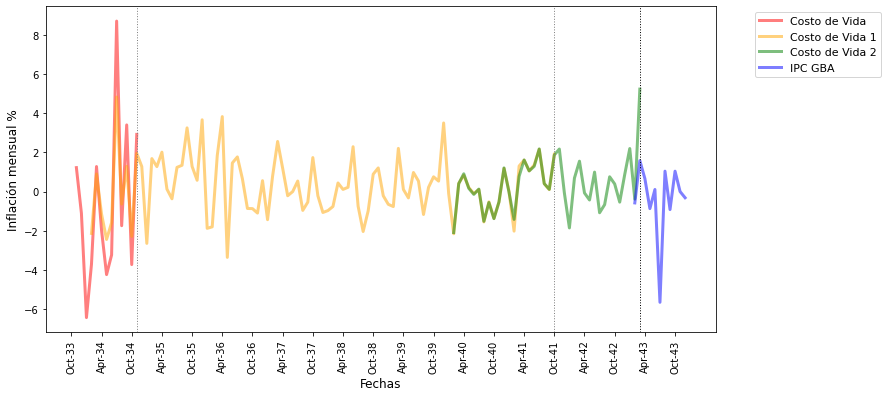

In [72]:
# Formatea la columna 'Período' como 'mmm-yy'
usar = costo_vida_filtrado2.copy()
usar['Período'] = usar['Período'].dt.strftime('%b-%y')

import numpy as np
import matplotlib.pyplot as plt

# Configuración de la tipografía
plt.rcParams.update({
        'font.family': 'sans-serif',  # Fuente serif
        'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 11,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
})

# Extrae las columnas de interés
fechas = usar['Período']

costo_vida = usar['costo_vida_MoM']
costo_vida_1 = usar['costo_vida_1_MoM']
costo_vida_2 = usar['costo_vida_2_MoM']
IPC_GBA = usar['IPC_GBA_MoM']
    
# Modifica el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea el gráfico de línea con marcadores de relleno blanco
plt.plot(fechas, costo_vida,color='red',linewidth=3,alpha=0.5,label='Costo de Vida')
plt.plot(fechas, costo_vida_1,color='orange',linewidth=3,alpha=0.5,label='Costo de Vida 1')
plt.plot(fechas, costo_vida_2,color='green',linewidth=3,alpha=0.5,label='Costo de Vida 2')
plt.plot(fechas, IPC_GBA,color='blue',linewidth=3,alpha=0.5, label='IPC GBA')
    
plt.axvline(x='Nov-34', color='grey', linestyle=':', linewidth=1)
plt.axvline(x='Oct-41', color='grey', linestyle=':', linewidth=1)
plt.axvline(x='Mar-43', color='black', linestyle=':', linewidth=1)

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Inflación mensual %')

# Rota las etiquetas del eje X y ajustar el espaciado entre ellas
plt.xticks(rotation=90)
plt.xticks(fechas[::6])  # Mostrar cada 6 meses

# Elimina las líneas de cuadrícula
plt.grid(False)

# Agrega la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print(f'Índices de precios al consumidor recopilados. Variaciones mensuales de cada índice')
# Muestra el gráfico
plt.show()

#### IPM

In [76]:
inflación_argentina_may = pd.DataFrame(base_datos['series']['inflación']['IPM Argentina']['data'])

precios_mayoristas = inflación_argentina_may[['Período', 'NGPM', 'PMBA']]
precios_mayoristas2 = precios_mayoristas.copy()
precios_mayoristas2['Período'] = pd.to_datetime(precios_mayoristas2['Período'])
precios_mayoristas_filtrado =  precios_mayoristas2[precios_mayoristas2['Período'] < '1949-01-01']
precios_mayoristas_filtrado2 = precios_mayoristas_filtrado.copy()
#definir inflaciones mensuales
precios_mayoristas_filtrado2['NGPM_MoM'] = precios_mayoristas_filtrado2['NGPM'].pct_change(1) * 100
precios_mayoristas_filtrado2['NGPM_MoM'] = precios_mayoristas_filtrado2['NGPM_MoM'].where(precios_mayoristas_filtrado2['NGPM'].notna())
precios_mayoristas_filtrado2['PMBA_MoM'] = precios_mayoristas_filtrado2['PMBA'].pct_change(1) * 100
precios_mayoristas_filtrado2['PMBA_MoM'] = precios_mayoristas_filtrado2['PMBA_MoM'].where(precios_mayoristas_filtrado2['PMBA'].notna())

Índices de precios mayoristas recopilados


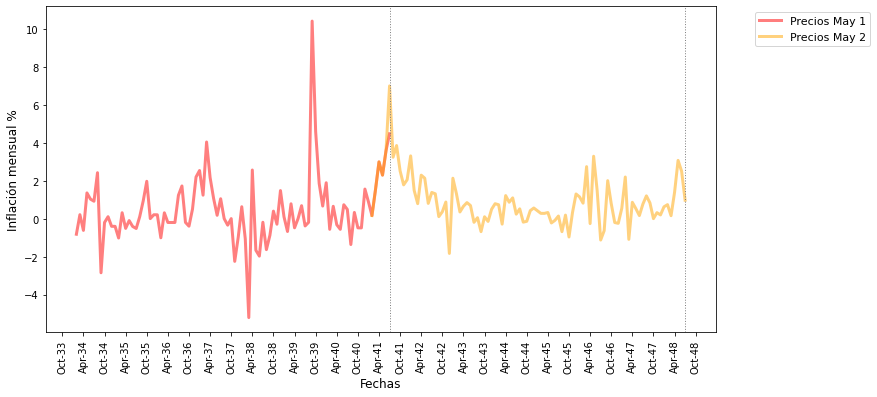

In [77]:
# Define las fechas de inicio y fin
usar = precios_mayoristas_filtrado2.copy()
# Formatea la columna 'Período' como 'mmm-yy'
usar['Período'] = usar['Período'].dt.strftime('%b-%y')

import numpy as np
import matplotlib.pyplot as plt

# Configuración de la tipografía
plt.rcParams.update({
        'font.family': 'sans-serif',  # Fuente serif
        'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 11,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
})

# Extrae las columnas de interés
fechas = usar['Período']
may_1 = usar['NGPM_MoM']
may_2 = usar['PMBA_MoM']
    
# Modifica el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea el gráfico de línea con marcadores de relleno blanco
plt.plot(fechas, may_1,color='red',linewidth=3,alpha=0.5,label='Precios May 1')
plt.plot(fechas, may_2,color='orange',linewidth=3,alpha=0.5,label='Precios May 2')
    
plt.axvline(x='Jul-41', color='grey', linestyle=':', linewidth=1)
plt.axvline(x='Jul-48', color='grey', linestyle=':', linewidth=1)

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Inflación mensual %')

# Rota las etiquetas del eje X y ajustar el espaciado entre ellas
plt.xticks(rotation=90)
plt.xticks(fechas[::6])  # Mostrar cada 6 meses

# Elimina las líneas de cuadrícula
plt.grid(False)

# Agrega la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print(f'Índices de precios mayoristas recopilados')
# Muestra el gráfico
plt.show()

---

#### El período 2006 a 2015

La medición oficial de la inflación en este período no puede ser utilizada como una representación de la situación real de la economía. La mayor evidencia de esto es la diferencia que muestra la variación del índice de precios al consumidor calculado por el INDEC respecto a los índices provinciales y a las estimaciones privadas reunidas en el Índice Congreso. Estas diferencias eran menores antes de 2006 y volvieron a ser mínimas desde 2016

#### Buscando los datasets

In [78]:
inflación_congreso = pd.DataFrame(base_datos['series']['inflación']['IPC Argentina']['datasets auxiliares']['IPC_Congreso']['data'])
inflación_provincias = pd.DataFrame(base_datos['series']['inflación']['IPC Argentina']['datasets auxiliares']['IPC_8_prov']['data'])
inflación_argentina = pd.DataFrame(base_datos['series']['inflación']['IPC Argentina']['data'])

In [79]:
inflación_provincias = inflación_provincias[['Período', 'IPC_NQN_Cbio_Base',
       'IPC_RN_Cbio_Base', 'IPC_JJY_Cbio_Base', 'IPC_CBA_Cbio_Base',
       'IPC_TCMN_Cbio_Base', 'IPC_MZA_Cbio_Base', 'IPC_SFE_Cbio_Base',
       'IPC_SL_Cbio_Base', 'IPC_8_prov']]

inflación_congreso = inflación_congreso[['Período', 'IPC_Congreso']]
inflación_argentina_IPC_GBA = inflación_argentina[['Período', 'IPC_GBA', 'IPC_Nu', 'IPC_GBA_2', 'IPC_nacional', 'IPCARG']]

comparaciones_infla_arg = pd.merge(inflación_argentina_IPC_GBA, inflación_congreso, on = 'Período', how='left')
comparaciones_infla_arg = pd.merge(comparaciones_infla_arg, inflación_provincias, on = 'Período', how='left')
comparaciones_infla_arg['Período'] = pd.to_datetime(comparaciones_infla_arg['Período'])
comparaciones_infla_arg.columns = comparaciones_infla_arg.columns.str.replace('_Cbio_Base', '')

#### Variaciones interanuales

In [80]:
comparaciones_infla_arg['IPC_GBA_YoY'] = comparaciones_infla_arg['IPC_GBA'].pct_change(12) * 100
comparaciones_infla_arg['IPC_GBA_YoY'] = comparaciones_infla_arg['IPC_GBA_YoY'].where(comparaciones_infla_arg['IPC_GBA'].notna())
comparaciones_infla_arg['IPC_Nu_YoY'] = comparaciones_infla_arg['IPC_Nu'].pct_change(12) * 100
comparaciones_infla_arg['IPC_Nu_YoY'] = comparaciones_infla_arg['IPC_Nu_YoY'].where(comparaciones_infla_arg['IPC_Nu'].notna())
comparaciones_infla_arg['IPC_GBA_2_YoY'] = comparaciones_infla_arg['IPC_GBA_2'].pct_change(12) * 100
comparaciones_infla_arg['IPC_GBA_2_YoY'] = comparaciones_infla_arg['IPC_GBA_2_YoY'].where(comparaciones_infla_arg['IPC_GBA_2'].notna())
comparaciones_infla_arg['IPC_nacional_YoY'] = comparaciones_infla_arg['IPC_nacional'].pct_change(12) * 100
comparaciones_infla_arg['IPC_nacional_YoY'] = comparaciones_infla_arg['IPC_nacional_YoY'].where(comparaciones_infla_arg['IPC_nacional'].notna())
comparaciones_infla_arg['IPC_Congreso_YoY'] = comparaciones_infla_arg['IPC_Congreso'].pct_change(12) * 100
comparaciones_infla_arg['IPC_Congreso_YoY'] = comparaciones_infla_arg['IPC_Congreso_YoY'].where(comparaciones_infla_arg['IPC_Congreso'].notna())
comparaciones_infla_arg['IPC_NQN_YoY'] = comparaciones_infla_arg['IPC_NQN'].pct_change(12) * 100
comparaciones_infla_arg['IPC_NQN_YoY'] = comparaciones_infla_arg['IPC_NQN_YoY'].where(comparaciones_infla_arg['IPC_NQN'].notna())
comparaciones_infla_arg['IPC_RN_YoY'] = comparaciones_infla_arg['IPC_RN'].pct_change(12) * 100
comparaciones_infla_arg['IPC_RN_YoY'] = comparaciones_infla_arg['IPC_RN_YoY'].where(comparaciones_infla_arg['IPC_RN'].notna())
comparaciones_infla_arg['IPC_JJY_YoY'] = comparaciones_infla_arg['IPC_JJY'].pct_change(12) * 100
comparaciones_infla_arg['IPC_JJY_YoY'] = comparaciones_infla_arg['IPC_JJY_YoY'].where(comparaciones_infla_arg['IPC_JJY'].notna())
comparaciones_infla_arg['IPC_CBA_YoY'] = comparaciones_infla_arg['IPC_CBA'].pct_change(12) * 100
comparaciones_infla_arg['IPC_CBA_YoY'] = comparaciones_infla_arg['IPC_CBA_YoY'].where(comparaciones_infla_arg['IPC_CBA'].notna())
comparaciones_infla_arg['IPC_TCMN_YoY'] = comparaciones_infla_arg['IPC_TCMN'].pct_change(12) * 100
comparaciones_infla_arg['IPC_TCMN_YoY'] = comparaciones_infla_arg['IPC_TCMN_YoY'].where(comparaciones_infla_arg['IPC_TCMN'].notna())
comparaciones_infla_arg['IPC_MZA_YoY'] = comparaciones_infla_arg['IPC_MZA'].pct_change(12) * 100
comparaciones_infla_arg['IPC_MZA_YoY'] = comparaciones_infla_arg['IPC_MZA_YoY'].where(comparaciones_infla_arg['IPC_MZA'].notna())
comparaciones_infla_arg['IPC_SFE_YoY'] = comparaciones_infla_arg['IPC_SFE'].pct_change(12) * 100
comparaciones_infla_arg['IPC_SFE_YoY'] = comparaciones_infla_arg['IPC_SFE_YoY'].where(comparaciones_infla_arg['IPC_SFE'].notna())
comparaciones_infla_arg['IPC_SL_YoY'] = comparaciones_infla_arg['IPC_SL'].pct_change(12) * 100
comparaciones_infla_arg['IPC_SL_YoY'] = comparaciones_infla_arg['IPC_SL_YoY'].where(comparaciones_infla_arg['IPC_SL'].notna())
comparaciones_infla_arg['IPC_8_prov_YoY'] = comparaciones_infla_arg['IPC_8_prov'].pct_change(12) * 100
comparaciones_infla_arg['IPC_8_prov_YoY'] = comparaciones_infla_arg['IPC_8_prov_YoY'].where(comparaciones_infla_arg['IPC_8_prov'].notna())
comparaciones_infla_arg['IPCARG_YoY'] = comparaciones_infla_arg['IPCARG'].pct_change(12) * 100
comparaciones_infla_arg['IPCARG_YoY'] = comparaciones_infla_arg['IPCARG_YoY'].where(comparaciones_infla_arg['IPCARG'].notna())

#### Variaciones mensuales

In [81]:
comparaciones_infla_arg['IPC_GBA_MoM'] = comparaciones_infla_arg['IPC_GBA'].pct_change(1) * 100
comparaciones_infla_arg['IPC_GBA_MoM'] = comparaciones_infla_arg['IPC_GBA_MoM'].where(comparaciones_infla_arg['IPC_GBA'].notna())
comparaciones_infla_arg['IPC_Nu_MoM'] = comparaciones_infla_arg['IPC_Nu'].pct_change(1) * 100
comparaciones_infla_arg['IPC_Nu_MoM'] = comparaciones_infla_arg['IPC_Nu_MoM'].where(comparaciones_infla_arg['IPC_Nu'].notna())
comparaciones_infla_arg['IPC_GBA_2_MoM'] = comparaciones_infla_arg['IPC_GBA_2'].pct_change(1) * 100
comparaciones_infla_arg['IPC_GBA_2_MoM'] = comparaciones_infla_arg['IPC_GBA_2_MoM'].where(comparaciones_infla_arg['IPC_GBA_2'].notna())
comparaciones_infla_arg['IPC_nacional_MoM'] = comparaciones_infla_arg['IPC_nacional'].pct_change(1) * 100
comparaciones_infla_arg['IPC_nacional_MoM'] = comparaciones_infla_arg['IPC_nacional_MoM'].where(comparaciones_infla_arg['IPC_nacional'].notna())
comparaciones_infla_arg['IPC_Congreso_MoM'] = comparaciones_infla_arg['IPC_Congreso'].pct_change(1) * 100
comparaciones_infla_arg['IPC_Congreso_MoM'] = comparaciones_infla_arg['IPC_Congreso_MoM'].where(comparaciones_infla_arg['IPC_Congreso'].notna())
comparaciones_infla_arg['IPC_NQN_MoM'] = comparaciones_infla_arg['IPC_NQN'].pct_change(1) * 100
comparaciones_infla_arg['IPC_NQN_MoM'] = comparaciones_infla_arg['IPC_NQN_MoM'].where(comparaciones_infla_arg['IPC_NQN'].notna())
comparaciones_infla_arg['IPC_RN_MoM'] = comparaciones_infla_arg['IPC_RN'].pct_change(1) * 100
comparaciones_infla_arg['IPC_RN_MoM'] = comparaciones_infla_arg['IPC_RN_MoM'].where(comparaciones_infla_arg['IPC_RN'].notna())
comparaciones_infla_arg['IPC_JJY_MoM'] = comparaciones_infla_arg['IPC_JJY'].pct_change(1) * 100
comparaciones_infla_arg['IPC_JJY_MoM'] = comparaciones_infla_arg['IPC_JJY_MoM'].where(comparaciones_infla_arg['IPC_JJY'].notna())
comparaciones_infla_arg['IPC_CBA_MoM'] = comparaciones_infla_arg['IPC_CBA'].pct_change(1) * 100
comparaciones_infla_arg['IPC_CBA_MoM'] = comparaciones_infla_arg['IPC_CBA_MoM'].where(comparaciones_infla_arg['IPC_CBA'].notna())
comparaciones_infla_arg['IPC_TCMN_MoM'] = comparaciones_infla_arg['IPC_TCMN'].pct_change(1) * 100
comparaciones_infla_arg['IPC_TCMN_MoM'] = comparaciones_infla_arg['IPC_TCMN_MoM'].where(comparaciones_infla_arg['IPC_TCMN'].notna())
comparaciones_infla_arg['IPC_MZA_MoM'] = comparaciones_infla_arg['IPC_MZA'].pct_change(1) * 100
comparaciones_infla_arg['IPC_MZA_MoM'] = comparaciones_infla_arg['IPC_MZA_MoM'].where(comparaciones_infla_arg['IPC_MZA'].notna())
comparaciones_infla_arg['IPC_SFE_MoM'] = comparaciones_infla_arg['IPC_SFE'].pct_change(1) * 100
comparaciones_infla_arg['IPC_SFE_MoM'] = comparaciones_infla_arg['IPC_SFE_MoM'].where(comparaciones_infla_arg['IPC_SFE'].notna())
comparaciones_infla_arg['IPC_SL_MoM'] = comparaciones_infla_arg['IPC_SL'].pct_change(1) * 100
comparaciones_infla_arg['IPC_SL_MoM'] = comparaciones_infla_arg['IPC_SL_MoM'].where(comparaciones_infla_arg['IPC_SL'].notna())
comparaciones_infla_arg['IPC_8_prov_MoM'] = comparaciones_infla_arg['IPC_8_prov'].pct_change(1) * 100
comparaciones_infla_arg['IPC_8_prov_MoM'] = comparaciones_infla_arg['IPC_8_prov_MoM'].where(comparaciones_infla_arg['IPC_8_prov'].notna())
comparaciones_infla_arg['IPCARG_MoM'] = comparaciones_infla_arg['IPCARG'].pct_change(1) * 100
comparaciones_infla_arg['IPCARG_MoM'] = comparaciones_infla_arg['IPCARG_MoM'].where(comparaciones_infla_arg['IPCARG'].notna())

#### Recortes de períodos

In [82]:
data_filtrado = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2003-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2020-01-01')]
data_filtrado_1 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2003-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2006-01-01')]
data_filtrado_2 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2005-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2010-11-01')]
data_filtrado_3 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2010-10-01') & 
                        (comparaciones_infla_arg['Período'] < '2014-01-01')]
data_filtrado_4 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2013-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2016-01-01')]
data_filtrado_5 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2015-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2017-01-01')]
data_filtrado_6 = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2016-12-01') & 
                        (comparaciones_infla_arg['Período'] < '2020-01-01')]
data_filtrado_extra = comparaciones_infla_arg[(comparaciones_infla_arg['Período'] > '2019-12-01')]

#### Promedios de las inflaciones mensuales. Un dataframe de ayuda

In [83]:
mensuales = ['IPC_GBA_MoM', 'IPC_Nu_MoM', 'IPC_GBA_2_MoM', 'IPC_nacional_MoM',
             'IPC_Congreso_MoM', 'IPC_NQN_MoM', 'IPC_RN_MoM', 'IPC_JJY_MoM',
             'IPC_CBA_MoM','IPC_TCMN_MoM','IPC_MZA_MoM','IPC_SFE_MoM','IPC_SL_MoM']

medias_período_1 = []
for var in mensuales:
    medias_período_1.append(data_filtrado_1[var].mean())
medias_período_2 = []
for var in mensuales:
    medias_período_2.append(data_filtrado_2[var].mean())
medias_período_3 = []
for var in mensuales:
    medias_período_3.append(data_filtrado_3[var].mean())
medias_período_4 = []
for var in mensuales:
    medias_período_4.append(data_filtrado_4[var].mean())
medias_período_5 = []
for var in mensuales:
    medias_período_5.append(data_filtrado_5[var].mean())
medias_período_6 = []
for var in mensuales:
    medias_período_6.append(data_filtrado_6[var].mean())
medias_período_extra = []
for var in mensuales:
    medias_período_extra.append(data_filtrado_extra[var].mean())

medias_var_mensuales = pd.DataFrame({
    'índice': mensuales,
    'período 1': medias_período_1,
    'período 2': medias_período_2,
    'período 3': medias_período_3,
    'período 4': medias_período_4,
    'período 5': medias_período_5,
    'período 6': medias_período_6,
    'período extra' : medias_período_extra
})

In [84]:
medias_var_mensuales = round(medias_var_mensuales, 2)

#### Funciones que crean dos gráficos

In [85]:
def grafico_anual(data):
    # Define las fechas de inicio y fin
    usar = data.copy()
    # Formatea la columna 'Período' como 'mmm-yy'
    usar['Período'] = usar['Período'].dt.strftime('%b-%y')

    import numpy as np
    import matplotlib.pyplot as plt

    # Configuración de la tipografía
    plt.rcParams.update({
        'font.family': 'sans-serif',  # Fuente serif
        'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 11,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
    })

    # Extrae las columnas de interés
    fechas = usar['Período']
    infla_arg = usar['IPC_GBA_YoY']
    infla_arg_1 = usar['IPC_Nu_YoY']
    infla_arg_2 = usar['IPC_Congreso_YoY']
    infla_arg_3 = usar['IPC_NQN_YoY']
    infla_arg_4 = usar['IPC_RN_YoY']
    infla_arg_5 = usar['IPC_JJY_YoY']
    infla_arg_6 = usar['IPC_CBA_YoY']
    infla_arg_7 = usar['IPC_TCMN_YoY']
    infla_arg_8 = usar['IPC_MZA_YoY']
    infla_arg_9 = usar['IPC_SFE_YoY']
    infla_arg_10 = usar['IPC_SL_YoY']
    infla_arg_11 = usar['IPC_8_prov_YoY']
    infla_arg_12 = usar['IPC_GBA_2_YoY']
    infla_arg_13 = usar['IPC_nacional_YoY']
    infla_arg_14 = usar['IPCARG_YoY']

    # Modifica el tamaño del gráfico
    plt.figure(figsize=(12, 6))

    # Crea el gráfico de línea con marcadores de relleno blanco
    plt.plot(fechas, infla_arg_3,color='forestgreen', linestyle=':',linewidth=1,label='IPC Nqn',alpha = 0.5)
    plt.plot(fechas, infla_arg_4,color='limegreen',linestyle=':',linewidth=1,label='IPC RN',alpha = 0.5)
    plt.plot(fechas, infla_arg_5,color='darkgreen',linestyle=':',linewidth=1,label='IPC JJY',alpha = 0.5)
    plt.plot(fechas, infla_arg_6,color='green',linestyle=':',linewidth=1,label='IPC CBA',alpha = 0.5)
    plt.plot(fechas, infla_arg_7,color='lime',linestyle=':',linewidth=1,label='IPC TUC',alpha = 0.5)
    plt.plot(fechas, infla_arg_8,color='seagreen',linestyle=':',linewidth=1,label='IPC MZA',alpha = 0.5)
    plt.plot(fechas, infla_arg_9,color='mediumseagreen',linestyle=':',linewidth=1,label='IPC SFe',alpha = 0.5)
    plt.plot(fechas, infla_arg_10,color='springgreen',linestyle=':',linewidth=1,label='IPC SL',alpha = 0.5)
    plt.plot(fechas, infla_arg_11,color='darkorange',linestyle='--',linewidth=1,label='IPC 8 prov.')
    plt.plot(fechas, infla_arg_2,color='red',linestyle='--',linewidth=1,label='IPC Congreso')
    plt.plot(fechas, infla_arg,color='cornflowerblue', linewidth=1.5,label='IPC GBA')
    plt.plot(fechas, infla_arg_1,color='mediumblue',linewidth=1.5,label='IPC Nu')
    plt.plot(fechas, infla_arg_13,color='darkblue',linewidth=1.5,label='IPC Nacional')
    plt.plot(fechas, infla_arg_14,color='black',linestyle=':',linewidth=2,label='IPC empalmado',alpha = 0.5)

    plt.axvline(x='Jan-06', color='black', linestyle=':', linewidth=1)
    plt.axvline(x='Nov-10', color='grey', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-13', color='grey', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-15', color='black', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-16', color='grey', linestyle=':', linewidth=1)

    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('Fechas')
    plt.ylabel('Inflación en %')

    # Rota las etiquetas del eje X y ajustar el espaciado entre ellas
    plt.xticks(rotation=90)
    plt.xticks(fechas[::6])  # Mostrar cada 6 meses

    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Agrega la leyenda fuera del gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    print(f'Comparación de Inflaciones interanuales según diversos índices de precios')
    # Muestra el gráfico
    plt.show()

In [86]:
def gráfico_mensual(data):
    # Define las fechas de inicio y fin
    usar = data.copy()
    # Formatea la columna 'Período' como 'mmm-yy'
    usar['Período'] = usar['Período'].dt.strftime('%b-%y')

    import numpy as np
    import matplotlib.pyplot as plt

    # Configuración de la tipografía
    plt.rcParams.update({
        'font.family': 'sans-serif',  # Fuente serif
        'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 11,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
    })

    # Extrae las columnas de interés
    fechas = usar['Período']
    infla_arg = usar['IPC_GBA_MoM']
    infla_arg_1 = usar['IPC_Nu_MoM']
    infla_arg_2 = usar['IPC_Congreso_MoM']
    infla_arg_3 = usar['IPC_NQN_MoM']
    infla_arg_4 = usar['IPC_RN_MoM']
    infla_arg_5 = usar['IPC_JJY_MoM']
    infla_arg_6 = usar['IPC_CBA_MoM']
    infla_arg_7 = usar['IPC_TCMN_MoM']
    infla_arg_8 = usar['IPC_MZA_MoM']
    infla_arg_9 = usar['IPC_SFE_MoM']
    infla_arg_10 = usar['IPC_SL_MoM']
    infla_arg_11 = usar['IPC_8_prov_MoM']
    infla_arg_12 = usar['IPC_GBA_2_MoM']
    infla_arg_13 = usar['IPC_nacional_MoM']
    infla_arg_14 = usar['IPCARG_MoM']

    # Modifica el tamaño del gráfico
    plt.figure(figsize=(12, 6))

    # Crea el gráfico de línea con marcadores de relleno blanco

    plt.plot(fechas, infla_arg_3,color='forestgreen',linestyle=':',linewidth=1,label='IPC Nqn',alpha = 0.5)
    plt.plot(fechas, infla_arg_4,color='limegreen',linestyle=':',linewidth=1,label='IPC RN',alpha = 0.5)
    plt.plot(fechas, infla_arg_5,color='darkgreen',linestyle=':',linewidth=1,label='IPC JJY',alpha = 0.5)
    plt.plot(fechas, infla_arg_6,color='green',linestyle=':',linewidth=1,label='IPC CBA',alpha = 0.5)
    plt.plot(fechas, infla_arg_7,color='lime',linestyle=':',linewidth=1,label='IPC TUC',alpha = 0.5)
    plt.plot(fechas, infla_arg_8,color='seagreen',linestyle=':',linewidth=1,label='IPC MZA',alpha = 0.5)
    plt.plot(fechas, infla_arg_9,color='mediumseagreen',linestyle=':',linewidth=1,label='IPC SFe',alpha = 0.5)
    plt.plot(fechas, infla_arg_10,color='springgreen',linestyle=':',linewidth=1,label='IPC SL',alpha = 0.5)
    plt.plot(fechas, infla_arg_11,color='darkorange',linestyle='--',linewidth=1,label='IPC 8 prov.')
    plt.plot(fechas, infla_arg_2,color='red',linestyle='--',linewidth=1,label='IPC Congreso')
    plt.plot(fechas, infla_arg,color='cornflowerblue',linewidth=1.5,label='IPC GBA')
    plt.plot(fechas, infla_arg_1, color='mediumblue',linewidth=1.5,label='IPC Nu')
    plt.plot(fechas, infla_arg_12,color='slateblue',linewidth=1.5,label='IPC GBA 2')
    plt.plot(fechas, infla_arg_13,color='darkblue',linewidth=1.5,label='IPC Nacional')
    plt.plot(fechas, infla_arg_14,color='black',linestyle=':',linewidth=2,label='IPC empalmado',alpha = 0.5)

    plt.axvline(x='Jan-06', color='black', linestyle=':', linewidth=1)
    plt.axvline(x='Nov-10', color='grey', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-13', color='grey', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-15', color='black', linestyle=':', linewidth=1)
    plt.axvline(x='Dec-16', color='grey', linestyle=':', linewidth=1)

    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('Fechas')
    plt.ylabel('Inflación mensual \nen %')

    # Rota las etiquetas del eje X y ajustar el espaciado entre ellas
    plt.xticks(rotation=90)
    plt.xticks(fechas[::6])  # Mostrar cada 6 meses

    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Agrega la leyenda fuera del gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    print(f'Comparación de Inflaciones mensuales según diversos índices de precios')
    # Muestra el gráfico
    plt.show()

#### La inflación interanual y la mensual de los distintos índices
Los gráficos muestran cómo a partir de 2007 la inflación estimada por las provincias se separó de la estimada por el INDEC. A su vez, la inflación medida por el IPC Congreso siempre se encontró lejos de la oficial. 

Comparación de Inflaciones interanuales según diversos índices de precios


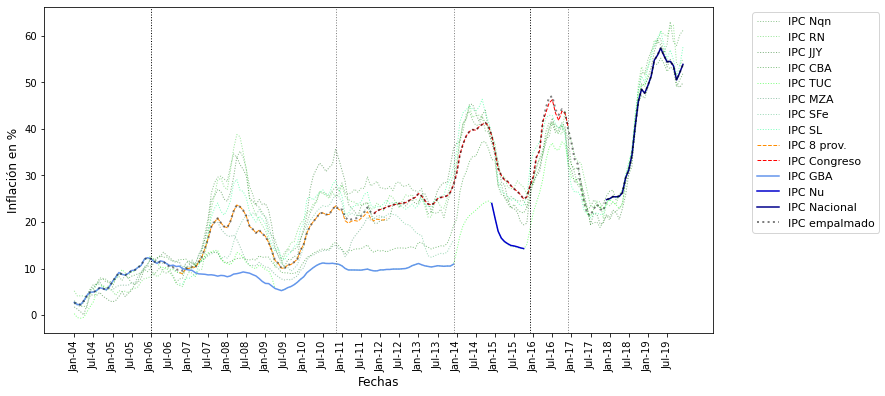

In [87]:
grafico_anual(data_filtrado)

Comparación de Inflaciones mensuales según diversos índices de precios


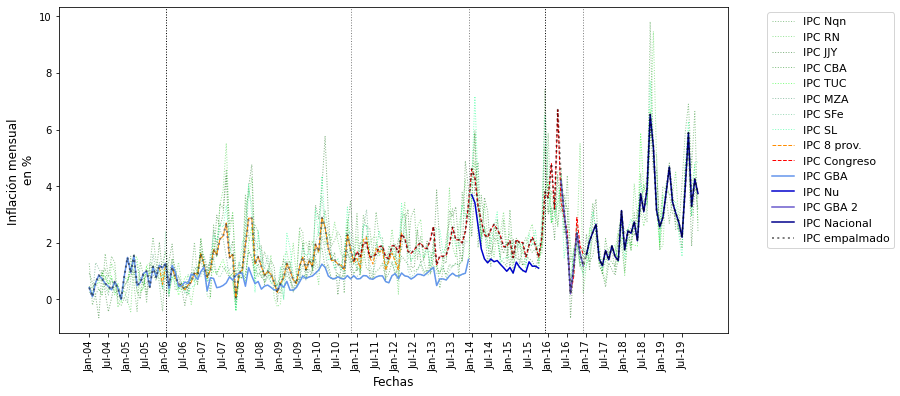

In [88]:
gráfico_mensual(data_filtrado)

#### Comparaciones por períodos
La problemática queda más clara cuando estas comparaciones se realizan por períodos

#### Definición de gráficos

In [90]:
def grafico1 (data, inicio, fin):
    # Define las fechas de inicio y fin
    usar = data.copy()
    # Formatea la columna 'Período' como 'mmm-yy'
    usar['Período'] = usar['Período'].dt.strftime('%b-%y')

    import numpy as np
    import matplotlib.pyplot as plt

    # Configuración de la tipografía
    plt.rcParams.update({
    'font.family': 'sans-serif',  # Fuente serif
    'font.serif': 'calibri',  # Tipo de fuente serif
    'font.size': 11,  # Tamaño de la fuente
    'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
    'axes.titlesize': 14,  # Tamaño del título del gráfico
    'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
    'legend.fontsize': 11,  # Tamaño de la leyenda
    })

    # Extrae las columnas de interés
    fechas = data_filtrado_formato['Período']

    infla_arg = usar['IPC_GBA_MoM']
    infla_arg_1 = usar['IPC_Nu_MoM']
    infla_arg_2 = usar['IPC_Congreso_MoM']
    infla_arg_3 = usar['IPC_NQN_MoM']
    infla_arg_4 = usar['IPC_RN_MoM']
    infla_arg_5 = usar['IPC_JJY_MoM']
    infla_arg_6 = usar['IPC_CBA_MoM']
    infla_arg_7 = usar['IPC_TCMN_MoM']
    infla_arg_8 = usar['IPC_MZA_MoM']
    infla_arg_9 = usar['IPC_SFE_MoM']
    infla_arg_10 = usar['IPC_SL_MoM']
    infla_arg_11 = usar['IPC_8_prov_MoM']
    infla_arg_12 = usar['IPC_GBA_2_MoM']
    infla_arg_13 = usar['IPC_nacional_MoM']
    infla_arg_14 = usar['IPCARG_MoM']
        
    # Modifica el tamaño del gráfico
    plt.figure(figsize=(10, 4))

    # Crea el gráfico de línea con marcadores de relleno blanco
    plt.plot(fechas, infla_arg_3,color='forestgreen',linestyle=':',linewidth=1,label='IPC Nqn',alpha = 0.5)
    plt.plot(fechas, infla_arg_4,color='limegreen',linestyle=':',linewidth=1,label='IPC RN',alpha = 0.5)
    plt.plot(fechas, infla_arg_5,color='darkgreen',linestyle=':',linewidth=1,label='IPC JJY',alpha = 0.5)
    plt.plot(fechas, infla_arg_6,color='green',linestyle=':',linewidth=1,label='IPC CBA',alpha = 0.5)
    plt.plot(fechas, infla_arg_7,color='lime',linestyle=':',linewidth=1,label='IPC TUC',alpha = 0.5)
    plt.plot(fechas, infla_arg_8,color='seagreen',linestyle=':',linewidth=1,label='IPC MZA',alpha = 0.5)
    plt.plot(fechas, infla_arg_9,color='mediumseagreen',linestyle=':',linewidth=1,label='IPC SFe',alpha = 0.5)
    plt.plot(fechas, infla_arg_10,color='springgreen',linestyle=':',linewidth=1,label='IPC SL',alpha = 0.5)
    plt.plot(fechas, infla_arg_11,color='darkorange',linestyle='--',linewidth=1,label='IPC 8 prov.')
    plt.plot(fechas, infla_arg_2,color='red',linestyle='--',linewidth=1,label='IPC Congreso')
    plt.plot(fechas, infla_arg,color='cornflowerblue',linewidth=1.5,label='IPC GBA')
    plt.plot(fechas, infla_arg_1, color='mediumblue',linewidth=1.5,label='IPC Nu')
    plt.plot(fechas, infla_arg_12,color='slateblue',linewidth=1.5,label='IPC GBA 2')
    plt.plot(fechas, infla_arg_13,color='darkblue',linewidth=1.5,label='IPC Nacional')
    plt.plot(fechas, infla_arg_14,color='black',linestyle=':',linewidth=2,label='IPC empalmado',alpha = 0.5)


    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('Fechas')
    plt.ylabel('Inflación mensual \nen %')

    # Rota las etiquetas del eje X y ajustar el espaciado entre ellas
    plt.xticks(rotation=90)
    plt.xticks(fechas[::1])  # Mostrar cada 6 meses

    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Agrega la leyenda fuera del gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    print(f'Comparación de Inflaciones mensuales según diversos índices de precios {inicio} a {fin}')
    # Muestra el gráfico
    plt.show()

In [91]:
def gráfico2(indice, período, inicio, fin):
    import numpy as np
    import matplotlib.pyplot as plt

    # Configuración de la tipografía
    plt.rcParams.update({
        'font.family': 'sans-serif',  # Fuente serif
        'font.serif': 'calibri',  # Tipo de fuente serif
        'font.size': 11,  # Tamaño de la fuente
        'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
        'axes.titlesize': 14,  # Tamaño del título del gráfico
        'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
        'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
        'legend.fontsize': 11,  # Tamaño de la leyenda
    })

    # Modifica el tamaño del gráfico
    plt.figure(figsize=(10, 4))

    plt.bar(indice, período,color='forestgreen',alpha = 0.5)

    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('Índice')
    plt.ylabel('Media de la inflación \nmensual en %')

    # Rota las etiquetas del eje X y ajustar el espaciado entre ellas
    plt.xticks(rotation=90)

    # Muestra el gráfico
    plt.show()

#### Comparaciones

Entre 2004 y 2005 los índices eran similares

Comparación de Inflaciones mensuales según diversos índices de precios ene-04 a dic-05


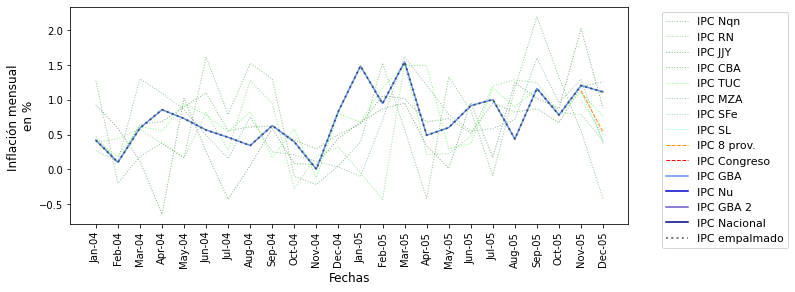

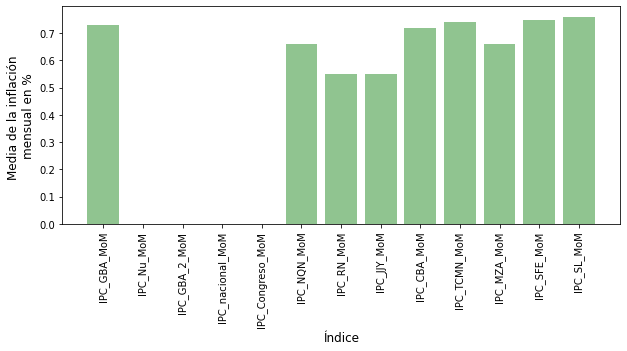

In [92]:
data = data_filtrado_1
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 1']
inicio = 'ene-04'
fin = 'dic-05'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

Desde fines de 2006 se hace evidente la separación entre la inflación mensual de los índices provinciales y la medida por el INDEC. La variación mensual promedio del IPC_GBA en entre 2006 y 2010 fue sensiblemente más baja. 

Comparación de Inflaciones mensuales según diversos índices de precios ene-06 a oct-10


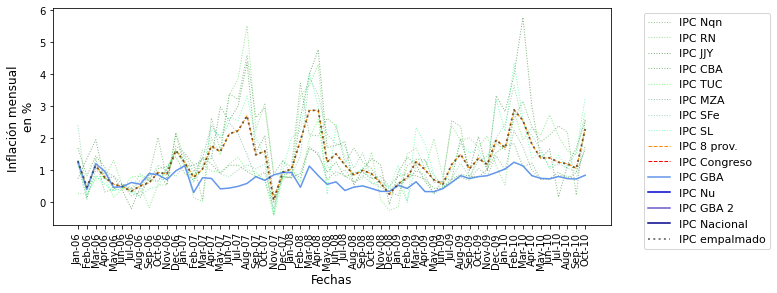

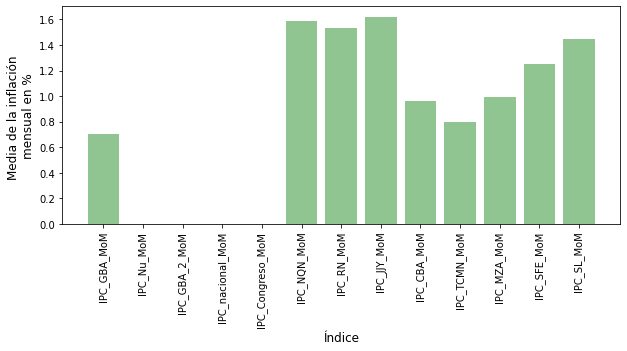

In [93]:
data = data_filtrado_2
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 2']
inicio = 'ene-06'
fin = 'oct-10'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

A partir de fines de 2010 se suma un nuevo indicador: el IPC Congreso. La inflación media hasta diciembre de 2013 medida por el INDEC fue, de nuevo, mucho menor a la medida por otros organismos (excepto por la de Tucumán, que prácticamente coincidió durante este período). 

Comparación de Inflaciones mensuales según diversos índices de precios nov-10 a dic-13


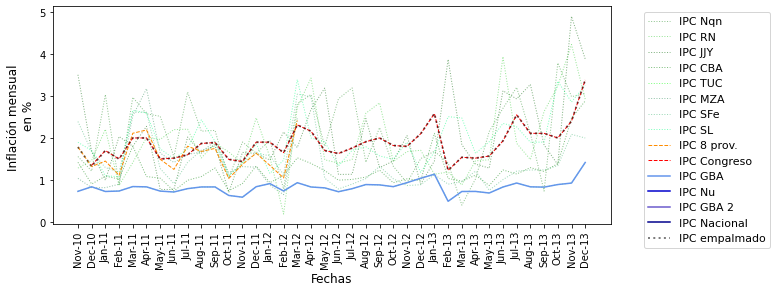

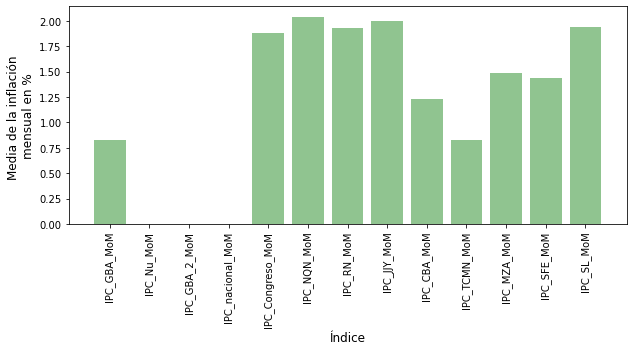

In [94]:
data = data_filtrado_3
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 3']
inicio = 'nov-10'
fin = 'dic-13'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

A partir de 2014 el INDEC publicó un nuevo indicador, pero siguió teniendo los problemas anteriores: la inflaicón mensual medida era más baja que la observada en otros índices. 

Comparación de Inflaciones mensuales según diversos índices de precios ene-14 a dic-15


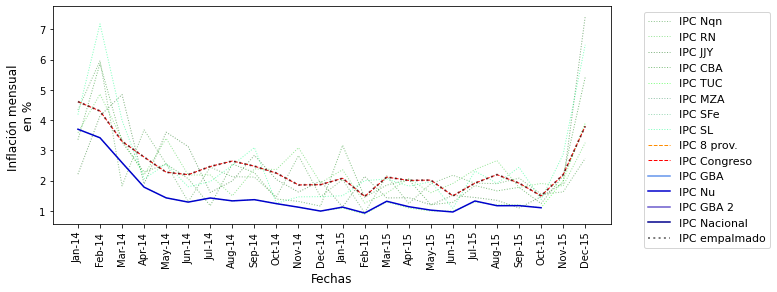

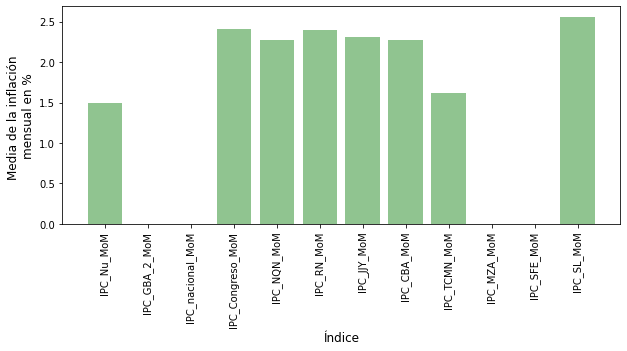

In [95]:
data = data_filtrado_4
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 4']
inicio = 'ene-14'
fin = 'dic-15'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

Finalmente, el nuevo gobierno publicó un índice provisorio en 2016 (IPC_GBA_2), que resultó en una medición de la inflación similar a la de los otros indicadores

Comparación de Inflaciones mensuales según diversos índices de precios ene-16 a dic-16


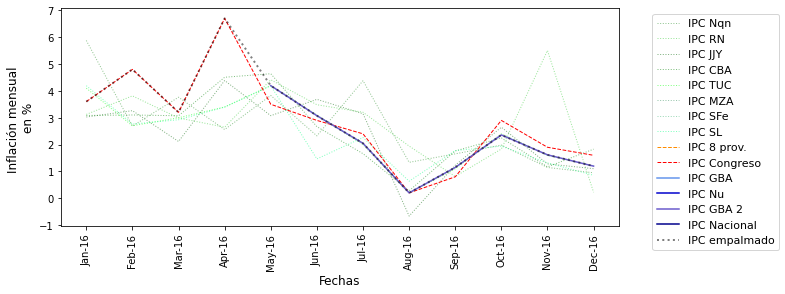

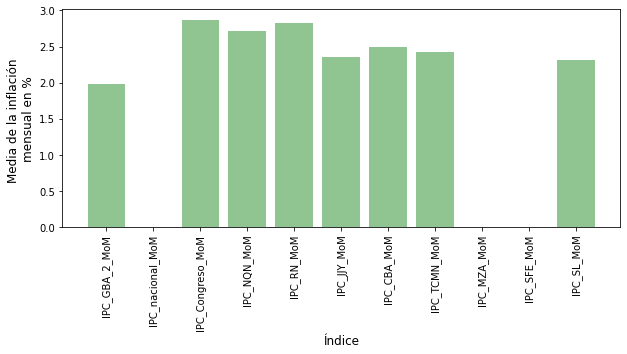

In [96]:
data = data_filtrado_5
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 5']
inicio = 'ene-16'
fin = 'dic-16'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

Y hacia fines de 2016, el índice actual (IPC_Nacional), que se comportó de manera similar a los provinciales

Comparación de Inflaciones mensuales según diversos índices de precios ene-17 a dic-19


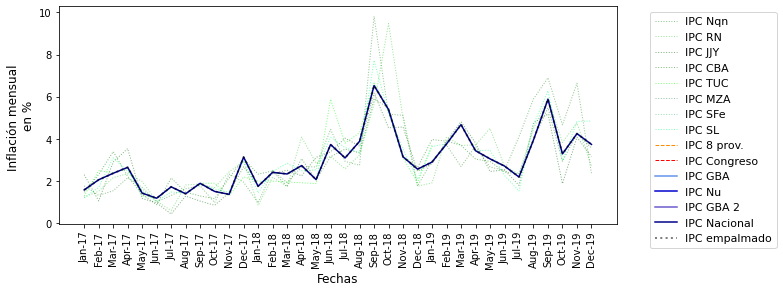

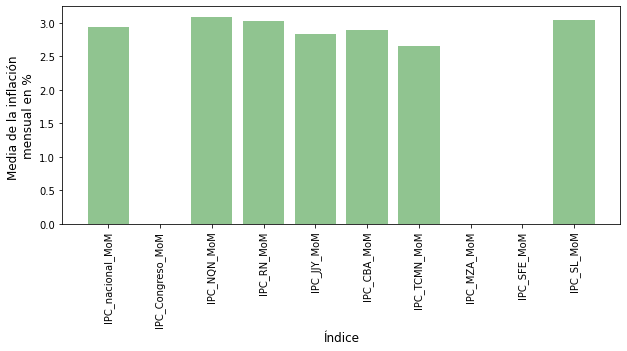

In [97]:
data = data_filtrado_6
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período 6']
inicio = 'ene-17'
fin = 'dic-19'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

Comparación de Inflaciones mensuales según diversos índices de precios ene-20 a abr-24


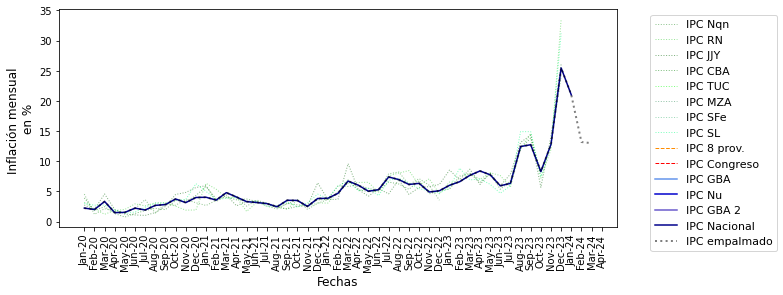

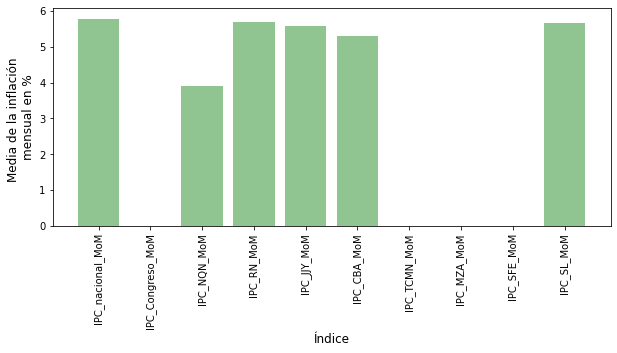

In [98]:
data = data_filtrado_extra
indice = medias_var_mensuales['índice']
período = medias_var_mensuales['período extra']
inicio = 'ene-20'
fin = 'abr-24'

grafico1 (data, inicio, fin)
gráfico2(indice, período, inicio, fin)

### Algunos gráficos de análisis

#### Inflación

In [100]:
inflación_argentina_min = pd.DataFrame(base_datos['series']['inflación']['IPC Argentina']['data'])
inflación_argentina_may = pd.DataFrame(base_datos['series']['inflación']['IPM Argentina']['data'])
inflación_externa = pd.DataFrame(base_datos['series']['inflación']['IPC Externo']['data'])

inflación_argentina_IPCARG = inflación_argentina[['Período', 'IPCARG']]

inflación_argentina_may_3_seg = inflación_argentina_may[['Período',  'IPM_1', 'IPM_2', 'IPM_3']]

inflación_externa_UK_US = inflación_externa[['Período', 'IPCUK', 'IPCUS']]

inflaciones = pd.merge(inflación_argentina_IPCARG, inflación_argentina_may_3_seg, on='Período')
inflaciones = pd.merge(inflaciones, inflación_externa_UK_US, on='Período')

# Convertir la columna 'Período' a datetime
inflaciones_editado = inflaciones.copy()
inflaciones_editado['Período'] = pd.to_datetime(inflaciones_editado['Período'])
inflaciones_editado['año'] = inflaciones_editado['Período'].dt.year

print(list(inflaciones_editado.columns))

['Período', 'IPCARG', 'IPM_1', 'IPM_2', 'IPM_3', 'IPCUK', 'IPCUS', 'año']


#### Variaciones interanuales

In [101]:
# Calcula variables y asigna nombres y descripciones en la metadata
inflaciones_editado['IPCARG_YoY'] = inflaciones_editado['IPCARG'].pct_change(12) * 100
inflaciones_editado['IPCARG_YoY'] = inflaciones_editado['IPCARG_YoY'].where(inflaciones_editado['IPCARG'].notna())

inflaciones_editado['IPCUK_YoY'] = inflaciones_editado['IPCUK'].pct_change(12) * 100
inflaciones_editado['IPCUK_YoY'] = inflaciones_editado['IPCUK_YoY'].where(inflaciones_editado['IPCUK'].notna())

inflaciones_editado['IPCUS_YoY'] = inflaciones_editado['IPCUS'].pct_change(12) * 100
inflaciones_editado['IPCUS_YoY'] = inflaciones_editado['IPCUS_YoY'].where(inflaciones_editado['IPCUS'].notna())

inflaciones_editado['EXTERNA_YoY'] = (inflaciones_editado['IPCUK_YoY']+inflaciones_editado['IPCUS_YoY'])/2

inflaciones_editado['IPM_1_YoY'] = inflaciones_editado['IPM_1'].pct_change(12) * 100
inflaciones_editado['IPM_1_YoY'] = inflaciones_editado['IPM_1_YoY'].where(inflaciones_editado['IPM_1'].notna())

inflaciones_editado['IPM_2_YoY'] = inflaciones_editado['IPM_2'].pct_change(12) * 100
inflaciones_editado['IPM_2_YoY'] = inflaciones_editado['IPM_2_YoY'].where(inflaciones_editado['IPM_2'].notna())

inflaciones_editado['IPM_3_YoY'] = inflaciones_editado['IPM_3'].pct_change(12) * 100
inflaciones_editado['IPM_3_YoY'] = inflaciones_editado['IPM_3_YoY'].where(inflaciones_editado['IPM_3'].notna())

In [102]:
# Define una función personalizada para aplicar a cada fila, corrige nan
def custom_function(row):
    if row.notna().sum() > 0:
        return row.dropna().iloc[0]
    else:
        return np.nan

# Crea una nueva columna aplicando la función a cada fila
inflaciones_editado['IPM_YoY'] = inflaciones_editado[['IPM_1_YoY', 'IPM_2_YoY','IPM_3_YoY']].apply(custom_function, axis=1)

#### Gráfico comparativo

In [103]:
# Define las fechas de inicio y fin
fecha_inicio = '1939-01-01'
fecha_fin = '1960-12-01'
data_filtrado = inflaciones_editado.copy()
# Filtra el DataFrame entre las fechas de inicio y fin
data_filtrado = data_filtrado[(data_filtrado['Período'] >= fecha_inicio) & (data_filtrado['Período'] < fecha_fin)]
data_filtrado_formato = data_filtrado.copy()
# Formatea la columna 'Período' como 'mmm-yy'
data_filtrado_formato['Período'] = data_filtrado_formato['Período'].dt.strftime('%b-%y')
año_min = data_filtrado_formato['año'].min()
año_max = data_filtrado_formato['año'].max()

Inflación comparada Argentina vs. Internacional (promedio de USA y UK). 1939 a 1960


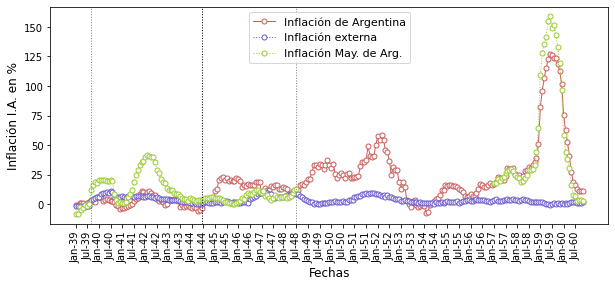

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la tipografía
plt.rcParams.update({
    'font.family': 'sans-serif',  # Fuente serif
    'font.serif': 'calibri',  # Tipo de fuente serif
    'font.size': 11,  # Tamaño de la fuente
    'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
    'axes.titlesize': 14,  # Tamaño del título del gráfico
    'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
    'legend.fontsize': 11,  # Tamaño de la leyenda
})

# Extrae las columnas de interés
fechas = data_filtrado_formato['Período']
infla_arg = data_filtrado_formato['IPCARG_YoY']
infla_arg_may = data_filtrado_formato['IPM_YoY']
infla_ext = data_filtrado_formato['EXTERNA_YoY']
        
# Modifica el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Crea el gráfico de línea con marcadores de relleno blanco
plt.plot(fechas, infla_arg, 
         marker='o', 
         color='indianred', 
         markerfacecolor='white', 
         markersize=5, 
         linewidth=1,
         label='Inflación de Argentina')
plt.plot(fechas, infla_ext, 
         marker='o', 
         color='slateblue', 
         linestyle=':',
         linewidth=1, 
         markerfacecolor='white', 
         markersize=5,
         label='Inflación externa')
plt.plot(fechas, infla_arg_may, 
         marker='o', 
         color='yellowgreen', 
         linestyle=':',
         linewidth=1, 
         markerfacecolor='white', 
         markersize=5,
         label='Inflación May. de Arg.')
        
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Inflación I.A. en %')

# Rota las etiquetas del eje X y ajustar el espaciado entre ellas
plt.xticks(rotation=90)
plt.xticks(fechas[::6])  # Mostrar cada 6 meses

if fecha_inicio < '1948-07-01':
    plt.axvline(x='Sep-39', color='grey', linestyle=':', linewidth=1)
    plt.axvline(x='Jun-44', color='black', linestyle=':', linewidth=1)
    plt.axvline(x='Jul-48', color='grey', linestyle=':', linewidth=1)

# Elimina las líneas de cuadrícula
plt.grid(False)
        
# Muestra la leyenda
plt.legend()

print(f'Inflación comparada Argentina vs. Internacional (promedio de USA y UK). {año_min} a {año_max}')
# Muestra el gráfico
plt.show()

#### Variables Monetarias 

In [106]:
monetarias = pd.DataFrame(base_datos['series']['monetarias']['data'])

In [107]:
monetarias.columns

Index(['Período', 'Oro_Rev_Caja', 'Titulos_1_Caja', 'Titulos_2_Caja',
       'Deuda_gov_Caja', 'Redescuentos_Caja', 'Billetes_Caja', 'TC_dolar_Caja',
       'Sector_externo_BCRApre41', 'Sector_gobierno_BCRApre41',
       'Doc_redescontados_BCRApre41', 'Certificados_BCRApre41',
       'Base_monet_BCRApre41', 'TC_vend_BCRApre41', 'Act_ext_base_actual',
       'Sector_oficial_base_actual', 'Cred_fina_base_actual',
       'Títulos_propios_base_actual', 'Base_monet_base_actual',
       'TC_valuac_base_actual', 'Act_ext', 'Sector_oficial', 'Cred_finan',
       'Títulos_BCRA', 'Base_monet', 'TC_valuac'],
      dtype='object')

In [108]:
monetarias_empalmadas = monetarias[['Período',
                                    'Act_ext', 
                                    'Sector_oficial', 
                                    'Cred_finan',
                                    'Títulos_BCRA', 
                                    'Base_monet', 
                                    'TC_valuac']]

In [109]:
monetarias_empalmadas = pd.merge(monetarias_empalmadas, inflación_argentina_IPCARG, on='Período')

In [110]:
monetarias_empalmadas_editado = monetarias_empalmadas.copy()
monetarias_empalmadas_editado['Período'] = pd.to_datetime(monetarias_empalmadas_editado['Período'])
monetarias_empalmadas_editado['año'] = monetarias_empalmadas_editado['Período'].dt.year

In [111]:
monetarias_empalmadas_editado['Base_monet_real'] = monetarias_empalmadas_editado['Base_monet']/monetarias_empalmadas_editado['IPCARG']
monetarias_empalmadas_editado['Act_ext_USD'] = monetarias_empalmadas_editado['Act_ext']/monetarias_empalmadas_editado['TC_valuac']
monetarias_empalmadas_editado['Act_internos'] = monetarias_empalmadas_editado['Sector_oficial'] + monetarias_empalmadas_editado['Cred_finan']
monetarias_empalmadas_editado['Act_internos_real'] = monetarias_empalmadas_editado['Act_internos']/monetarias_empalmadas_editado['IPCARG']

Base Monetaria Real


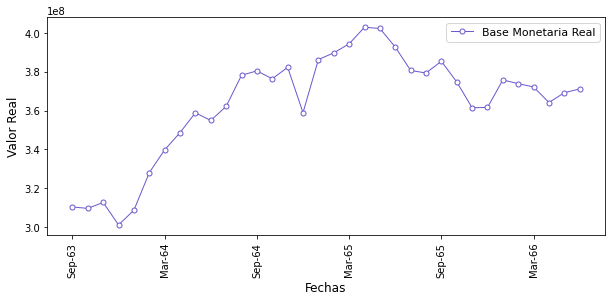

In [112]:
# Define las fechas de inicio y fin
fecha_inicio = '1963-09-01'
fecha_fin = '1966-07-01'
data_filtrado = monetarias_empalmadas_editado.copy()
# Filtra el DataFrame entre las fechas de inicio y fin
data_filtrado = data_filtrado[(data_filtrado['Período'] >= fecha_inicio) & (data_filtrado['Período'] < fecha_fin)]
data_filtrado_formato = data_filtrado.copy()
# Formatea la columna 'Período' como 'mmm-yy'
data_filtrado_formato['Período'] = data_filtrado_formato['Período'].dt.strftime('%b-%y')
año_min = data_filtrado_formato['año'].min()
año_max = data_filtrado_formato['año'].max()

import numpy as np
import matplotlib.pyplot as plt

# Configuración de la tipografía
plt.rcParams.update({
    'font.family': 'sans-serif',  # Fuente serif
    'font.serif': 'calibri',  # Tipo de fuente serif
    'font.size': 11,  # Tamaño de la fuente
    'axes.labelsize': 12,  # Tamaño de la etiqueta de los ejes
    'axes.titlesize': 14,  # Tamaño del título del gráfico
    'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
    'legend.fontsize': 11,  # Tamaño de la leyenda
})

# Extrae las columnas de interés
fechas = data_filtrado_formato['Período']
infla_arg = data_filtrado_formato['Base_monet_real']

        
# Modifica el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Crea el gráfico de línea con marcadores de relleno blanco
plt.plot(fechas, infla_arg, 
         marker='o', 
         color='slateblue', 
         markerfacecolor='white', 
         markersize=5, 
         linewidth=1,
         label='Base Monetaria Real')

        
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Valor Real')

# Rota las etiquetas del eje X y ajustar el espaciado entre ellas
plt.xticks(rotation=90)
plt.xticks(fechas[::6])  # Mostrar cada 6 meses

# Elimina las líneas de cuadrícula
plt.grid(False)
        
# Muestra la leyenda
plt.legend()
print(f'Base Monetaria Real')
# Muestra el gráfico
plt.show()